# Import libraries and initial data analysis

In [2183]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2184]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2185]:
dataset = [
    (df_train, "train"),
    (df_test, "test")
]

for df, name in dataset:
    print(f"There is {df.shape[0]} rows and {df.shape[1]} columns in the {name} dataset.")
    sum_data_duplicates = df.duplicated().sum()
    print(f"Duplicated fields in {name} dataset: {sum_data_duplicates}")

There is 1200000 rows and 21 columns in the train dataset.
Duplicated fields in train dataset: 0
There is 800000 rows and 20 columns in the test dataset.
Duplicated fields in test dataset: 0


In [2186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [2187]:
df_train.set_index('id', inplace=True)

In [2188]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [2189]:
df_train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [2190]:
df_test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [2191]:
for df, name in dataset:
    print(f"\n--- {name.upper()} Dataset ---")
    total_rows = df.shape[0]
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]

    if not null_columns.empty:
        print("Columns with null values (count | %):")
        # Sort columns by null count (or percentage) in descending order
        sorted_null_columns = null_columns.sort_values(ascending=True)
        for col, count in sorted_null_columns.items():
            percent = (count / total_rows) * 100
            print(f"- {col}: {count} nulls ({percent:.2f}%)")
    else:
        print("No columns with null values.")


--- TRAIN Dataset ---
Columns with null values (count | %):
- Insurance Duration: 1 nulls (0.00%)
- Vehicle Age: 6 nulls (0.00%)
- Marital Status: 18529 nulls (1.54%)
- Age: 18705 nulls (1.56%)
- Annual Income: 44949 nulls (3.75%)
- Health Score: 74076 nulls (6.17%)
- Customer Feedback: 77824 nulls (6.49%)
- Number of Dependents: 109672 nulls (9.14%)
- Credit Score: 137882 nulls (11.49%)
- Occupation: 358075 nulls (29.84%)
- Previous Claims: 364029 nulls (30.34%)

--- TEST Dataset ---
Columns with null values (count | %):
- Insurance Duration: 2 nulls (0.00%)
- Vehicle Age: 3 nulls (0.00%)
- Marital Status: 12336 nulls (1.54%)
- Age: 12489 nulls (1.56%)
- Annual Income: 29860 nulls (3.73%)
- Health Score: 49449 nulls (6.18%)
- Customer Feedback: 52276 nulls (6.53%)
- Number of Dependents: 73130 nulls (9.14%)
- Credit Score: 91451 nulls (11.43%)
- Occupation: 239125 nulls (29.89%)
- Previous Claims: 242802 nulls (30.35%)


In [2192]:
summary_dict = {col: df[col].describe() for col in null_columns.index}

# To display the summaries:
for col, summary in summary_dict.items():
    print(f"Summary for column: {col}")
    print(summary)
    print("\n")

Summary for column: Age
count    787511.000000
mean         41.136440
std          13.537829
min          18.000000
25%          30.000000
50%          41.000000
75%          53.000000
max          64.000000
Name: Age, dtype: float64


Summary for column: Annual Income
count    770140.000000
mean      32803.871471
std       32201.063749
min           2.000000
25%        8048.000000
50%       23981.000000
75%       44660.000000
max      149997.000000
Name: Annual Income, dtype: float64


Summary for column: Marital Status
count     787664
unique         3
top       Single
freq      263705
Name: Marital Status, dtype: object


Summary for column: Number of Dependents
count    726870.000000
mean          2.009337
std           1.415241
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Number of Dependents, dtype: float64


Summary for column: Occupation
count       560875
unique           3
top       Employed
freq     

# Exploratory data analysis

## Target values

In [2193]:
# Define style constants to match previous plots
MAIN_COLOR = 'dodgerblue'
SECONDARY_COLOR = 'navy'
TERTIARY_COLOR = 'darkorange'
EDGE_COLOR = 'white'
GRID_STYLE = dict(linestyle=':', alpha=0.7)
TEXT_COLOR = 'black'

In [2194]:
def format_axes(ax, title, xlabel, ylabel):
    """Apply consistent formatting to an axis."""
    ax.set_title(title, fontsize=12, fontweight='bold', color=SECONDARY_COLOR)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    # Optionally, remove top and right spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, **GRID_STYLE)

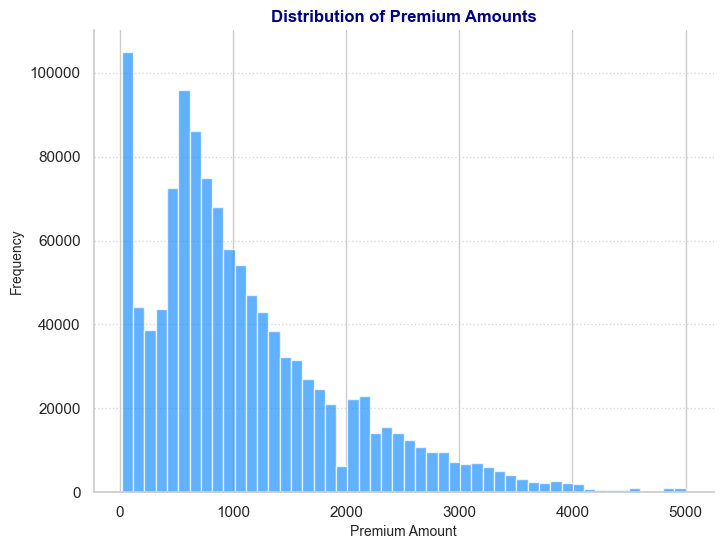

In [2195]:
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.hist(df_train["Premium Amount"], bins=50, edgecolor=EDGE_COLOR, color=MAIN_COLOR, alpha=0.7)
format_axes(ax, 'Distribution of Premium Amounts', 'Premium Amount', 'Frequency')
plt.show()

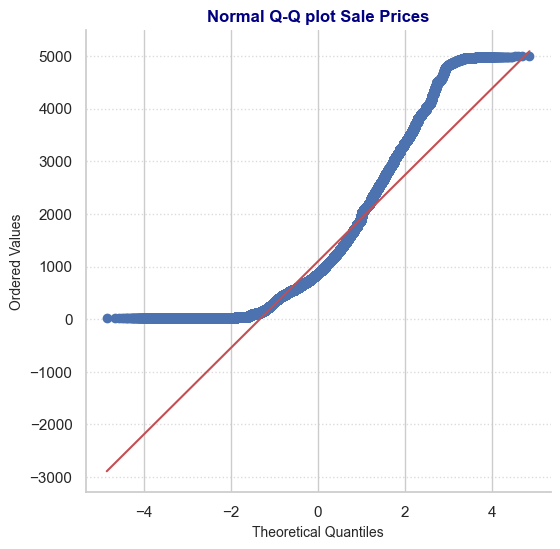

In [2196]:
plt.figure(figsize=(6, 6))
ax = plt.gca()
stats.probplot(df_train["Premium Amount"], dist="norm", plot=ax)
format_axes(ax, 'Normal Q-Q plot Sale Prices', 'Theoretical Quantiles', 'Ordered Values')
plt.show()

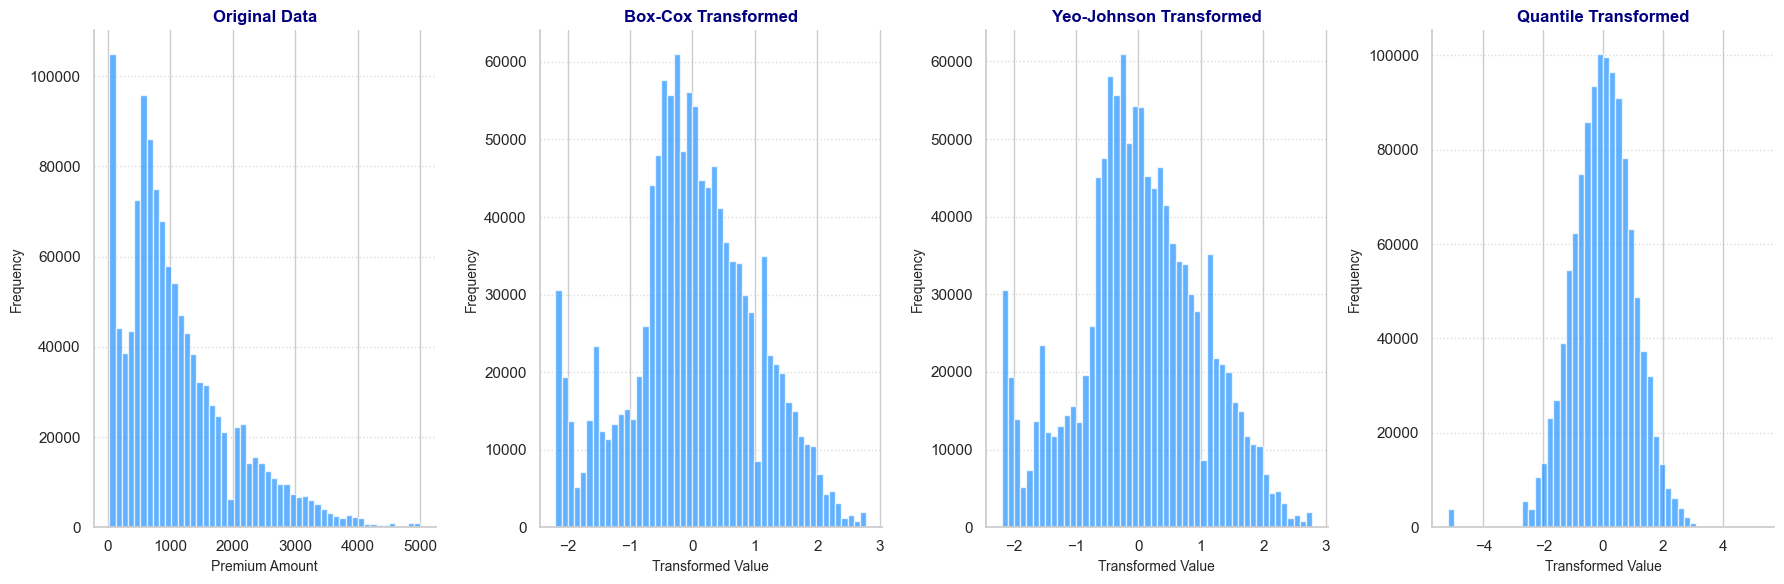

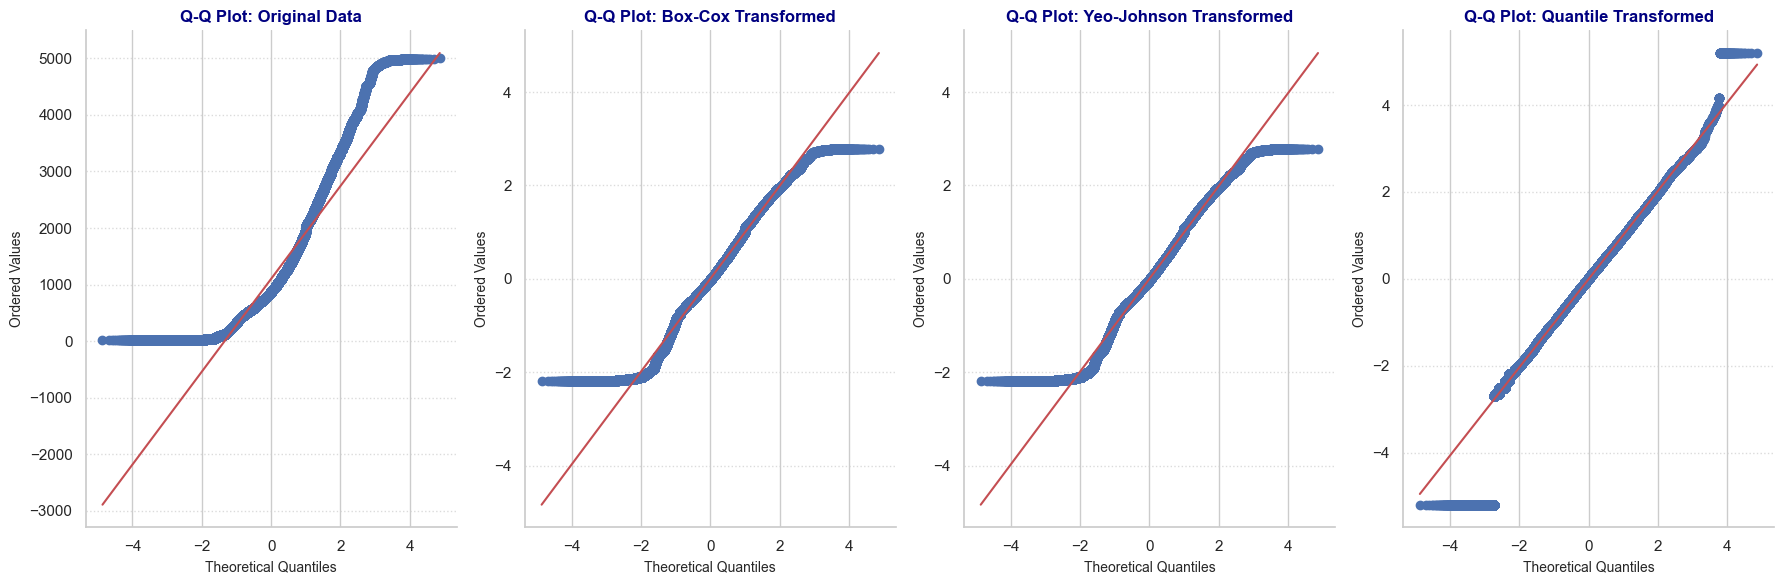

In [2197]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
# Initialize transformers
transformers = {
    'Box-Cox': PowerTransformer(method='box-cox', standardize=True),
    'Yeo-Johnson': PowerTransformer(method='yeo-johnson', standardize=True),
    'Quantile': QuantileTransformer(output_distribution='normal')
}

# Apply transformations and store results
transformed_data = {'Original': df_train["Premium Amount"]}
for name, transformer in transformers.items():
    transformed_data[name] = transformer.fit_transform(df_train[["Premium Amount"]]).flatten()

# Plot histograms
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
for ax, (name, data) in zip(axes, transformed_data.items()):
    ax.hist(data, bins=50, edgecolor=EDGE_COLOR, color=MAIN_COLOR, alpha=0.7)
    format_axes(ax, f"{name} Data" if name == 'Original' else f"{name} Transformed", 
                "Premium Amount" if name == 'Original' else "Transformed Value", "Frequency")
plt.tight_layout()
plt.show()

# Plot Q-Q plots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
for ax, (name, data) in zip(axes, transformed_data.items()):
    stats.probplot(data, dist="norm", plot=ax)
    format_axes(ax, f'Q-Q Plot: {name} Data' if name == 'Original' else f'Q-Q Plot: {name} Transformed',
                'Theoretical Quantiles', 'Ordered Values')
plt.tight_layout()
plt.show()

In [2198]:
df_train["Premium Amount"].describe()

count    1.200000e+06
mean     1.102545e+03
std      8.649989e+02
min      2.000000e+01
25%      5.140000e+02
50%      8.720000e+02
75%      1.509000e+03
max      4.999000e+03
Name: Premium Amount, dtype: float64

## Numerical values

In [2199]:
columns_numerical_values = df_train.select_dtypes("number").drop(columns=["Premium Amount"])
columns_numerical_values.count()

Age                     1181295
Annual Income           1155051
Number of Dependents    1090328
Health Score            1125924
Previous Claims          835971
Vehicle Age             1199994
Credit Score            1062118
Insurance Duration      1199999
dtype: int64

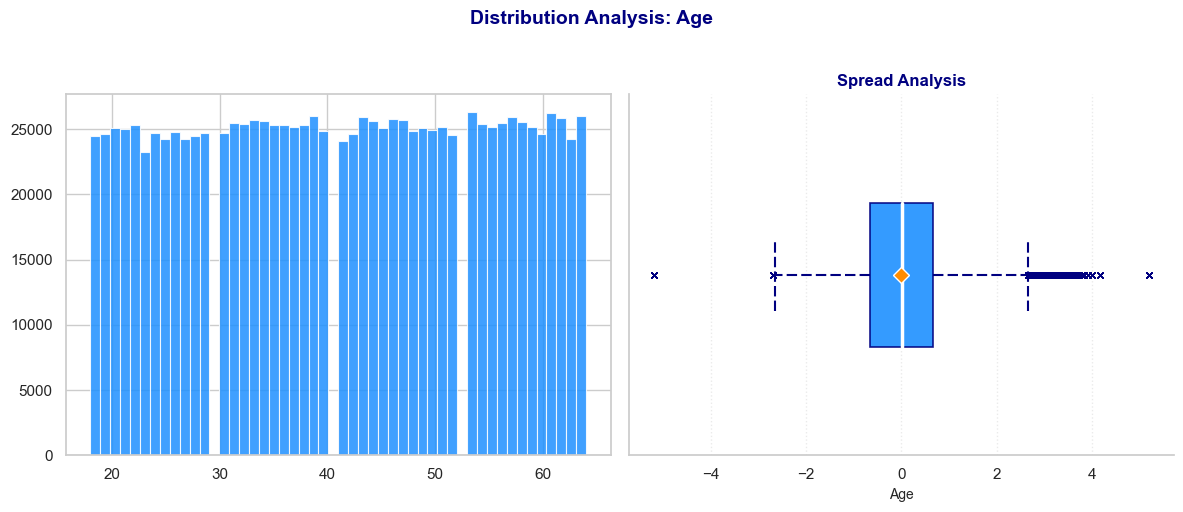

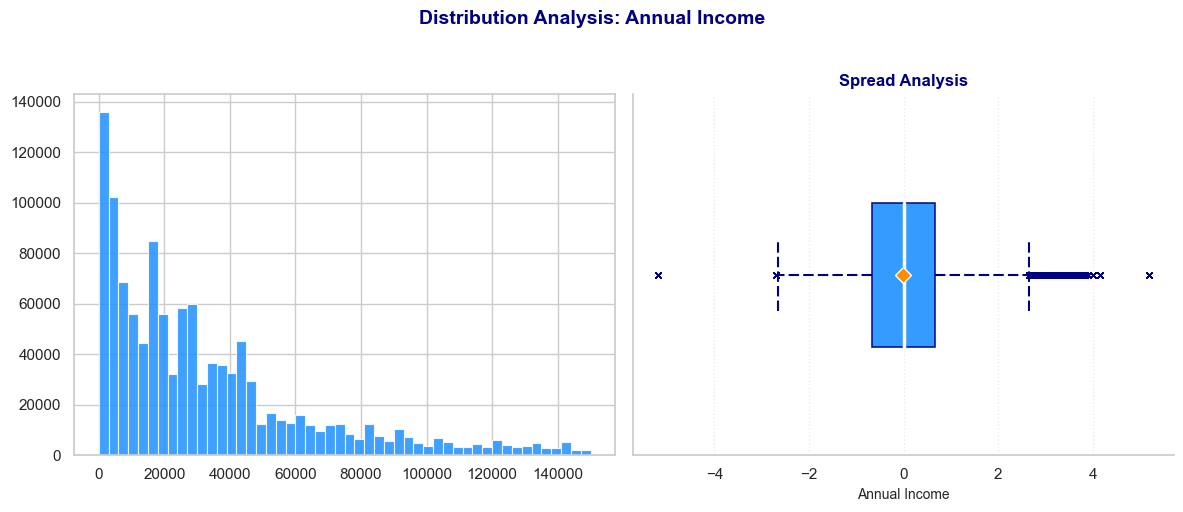

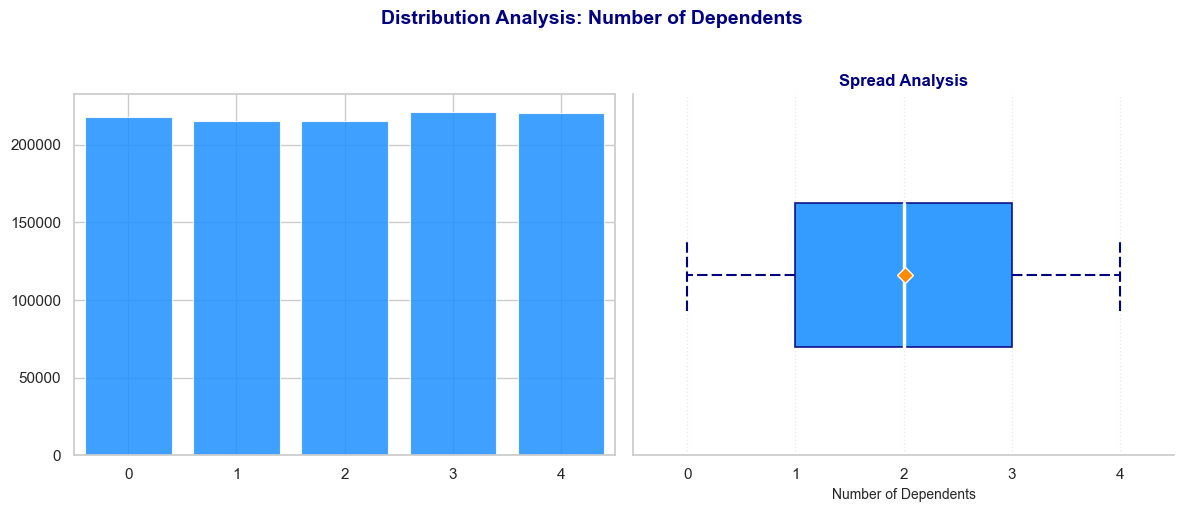

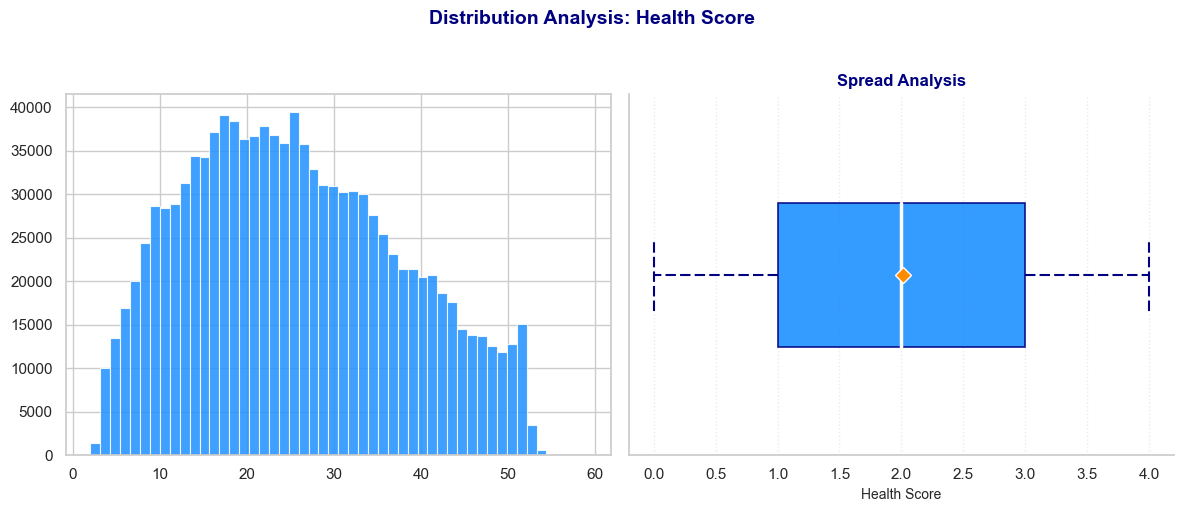

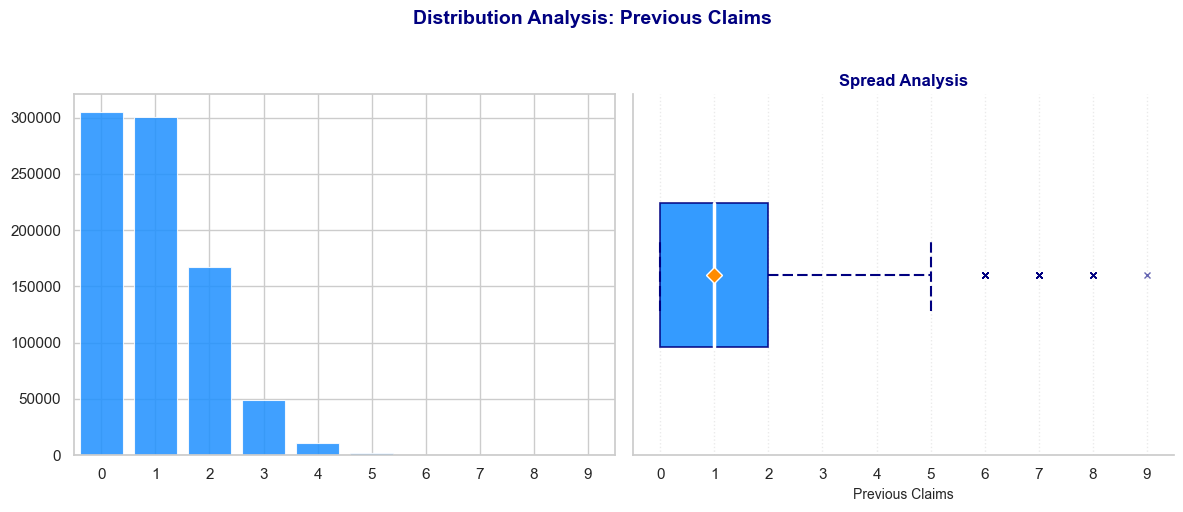

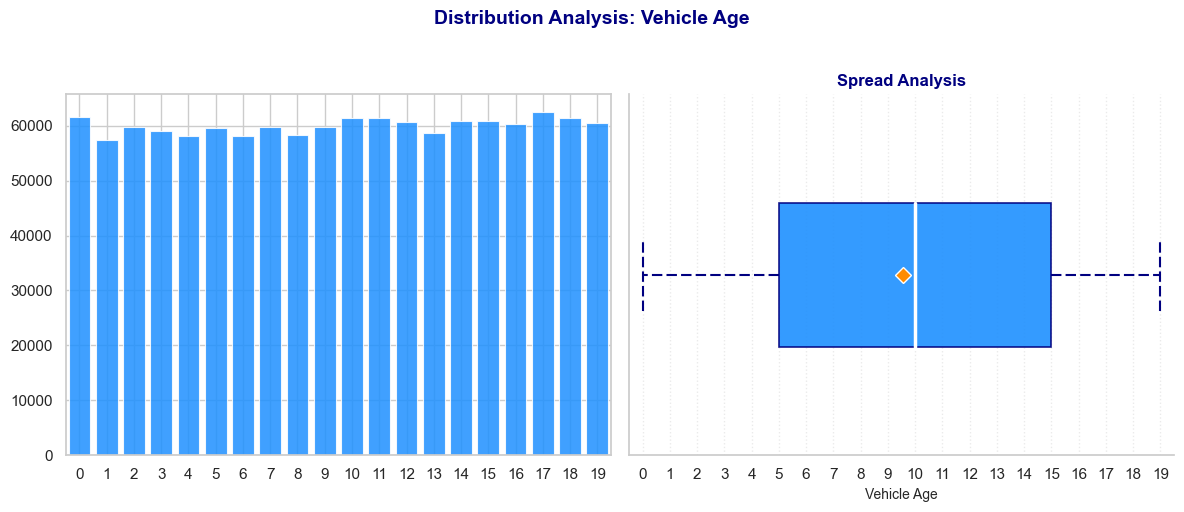

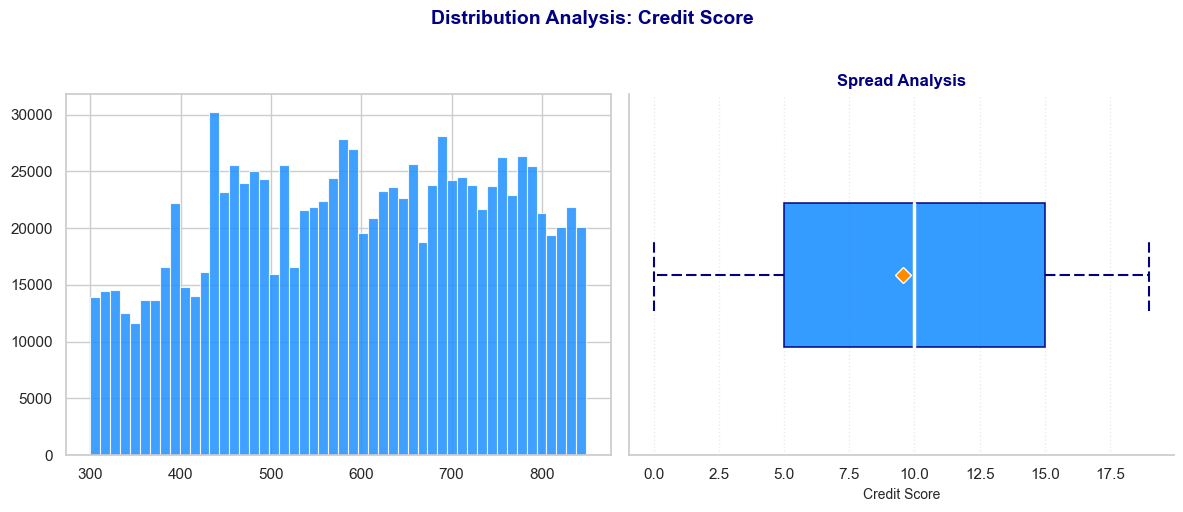

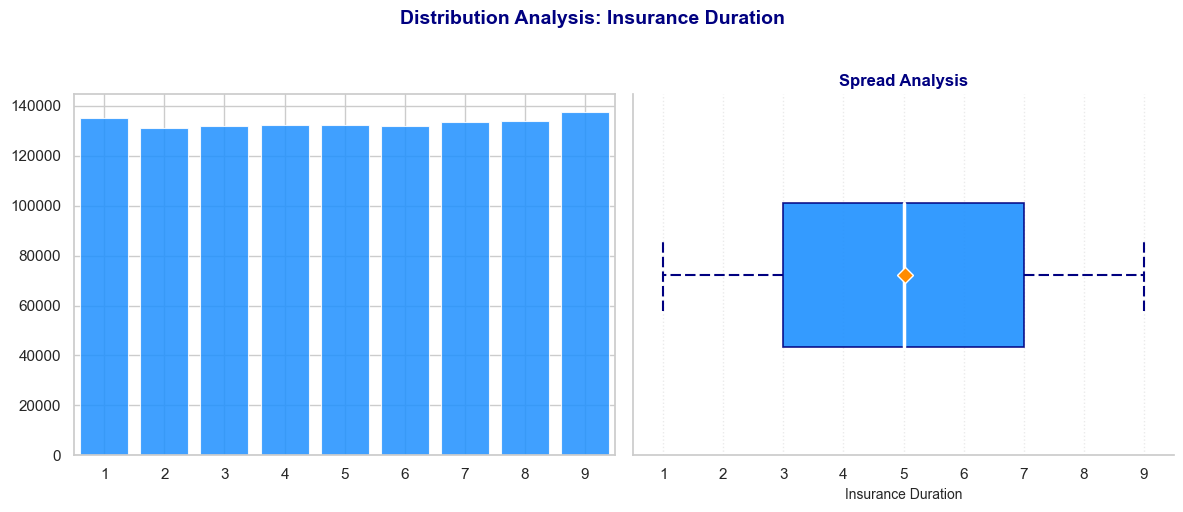

In [2200]:
from matplotlib.ticker import MultipleLocator

for col in columns_numerical_values.columns:
    plt.figure(figsize=(12, 5))
    sns.set_theme(style="whitegrid")
    plt.suptitle(f'Distribution Analysis: {col}', y=1.02,
                 fontsize=14, fontweight='semibold', color=SECONDARY_COLOR)

    # Left subplot: Histogram
    ax1 = plt.subplot(1, 2, 1)
    
    if col in ['Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Insurance Duration']:
        data = columns_numerical_values[col].dropna().astype(int)
        min_val = data.min()
        max_val = data.max()
        
        # Calculate value counts for perfect alignment
        value_counts = data.value_counts().sort_index()
        bins = np.arange(min_val - 0.5, max_val + 1.5, 1)
        
        # Plot with narrow bars (rwidth=0.8) and perfect alignment
        plt.hist(data, bins=bins, 
                 color=MAIN_COLOR, edgecolor=EDGE_COLOR, linewidth=0.8,
                 density=False, alpha=0.85, align='mid', rwidth=0.8)
        
        ax1.set_xlim(min_val - 0.5, max_val + 0.5)
        ax1.xaxis.set_major_locator(MultipleLocator(1))
        
        # Set exact integer labels from data
        ax1.set_xticks(np.arange(min_val, max_val + 1, 1))
        
    else:
        # Continuous case remains unchanged
        plt.hist(columns_numerical_values[col].dropna(), bins=50,
                 color=MAIN_COLOR, edgecolor=EDGE_COLOR, linewidth=0.8,
                 density=False, alpha=0.85)

    # Right subplot: Boxplot
    ax2 = plt.subplot(1, 2, 2)
    
    # Create compact boxplot
    bp = plt.boxplot(data if 'data' in locals() else columns_numerical_values[col].dropna(),
                    vert=False, 
                    widths=0.4,  # Narrower box width
                    patch_artist=True,
                    showmeans=True,
                    meanprops=dict(marker='D', markersize=8,
                                  markeredgecolor=EDGE_COLOR,
                                  markerfacecolor=TERTIARY_COLOR))

    # Enhanced boxplot styling
    for box in bp['boxes']:
        box.set(facecolor=MAIN_COLOR, 
                edgecolor=SECONDARY_COLOR, 
                linewidth=1.2,
                alpha=0.9)
        
    # Whisker and cap styling
    for element in ['whiskers', 'caps']:
        for line in bp[element]:
            line.set(color=SECONDARY_COLOR, 
                    linewidth=1.5, 
                    linestyle=(0, (5, 2)))  # Custom dash pattern

    # Median line styling
    for median in bp['medians']:
        median.set(color=EDGE_COLOR, 
                 linewidth=2.5, 
                 solid_capstyle='round')

    # Outlier styling
    for flier in bp['fliers']:
        flier.set(marker='x', 
                 markersize=5,
                 markeredgecolor=SECONDARY_COLOR,
                 alpha=0.6)

    # Axis synchronization with histogram
    if col in ['Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Insurance Duration']:
        ax2.set_xlim(min_val - 0.5, max_val + 0.5)
        ax2.xaxis.set_major_locator(MultipleLocator(1))
        ax2.set_xticks(np.arange(min_val, max_val + 1, 1))
        
    format_axes(ax2, "Spread Analysis", col, "")
    ax2.grid(**{**GRID_STYLE, 'alpha': 0.4})
    ax2.set_yticks([])

    plt.tight_layout()
    plt.show()

## Categorical values

In [2201]:
columns_object_values = df_train.select_dtypes("object")
columns_object_values.count()

Gender                1200000
Marital Status        1181471
Education Level       1200000
Occupation             841925
Location              1200000
Policy Type           1200000
Policy Start Date     1200000
Customer Feedback     1122176
Smoking Status        1200000
Exercise Frequency    1200000
Property Type         1200000
dtype: int64

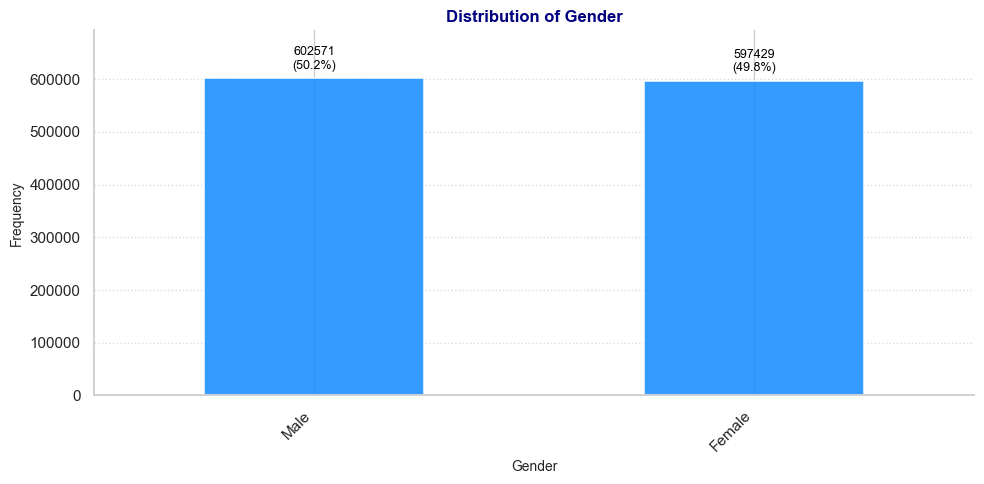

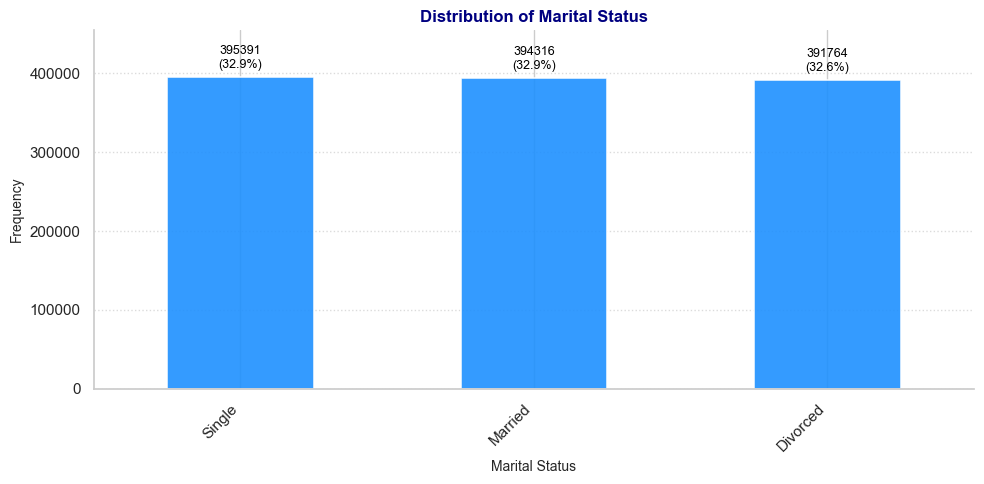

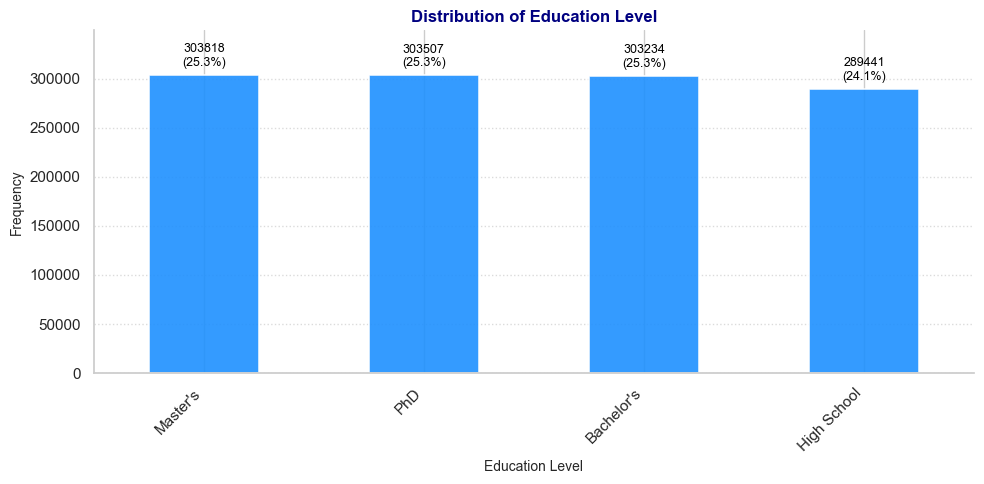

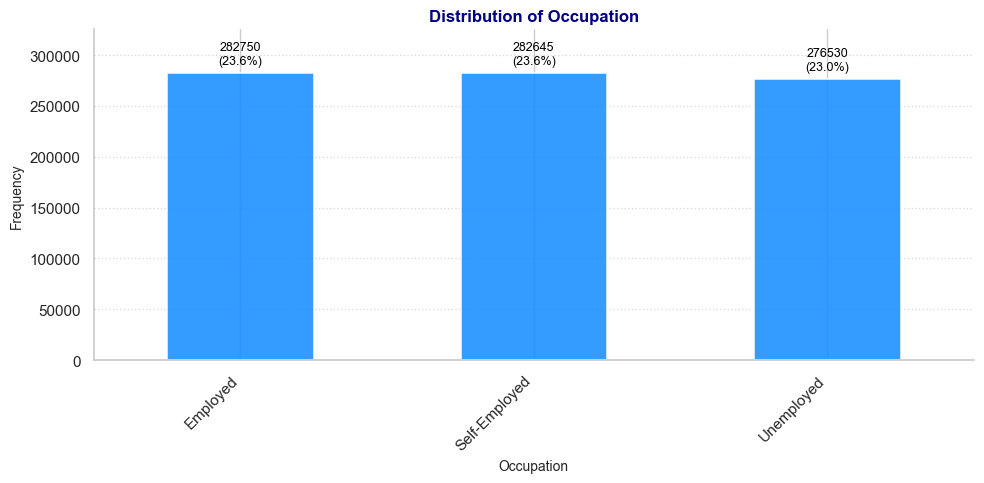

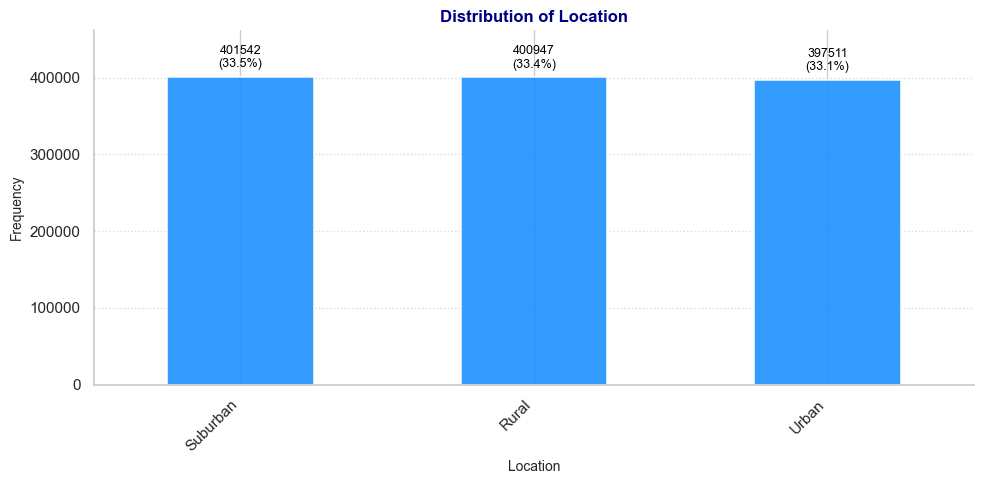

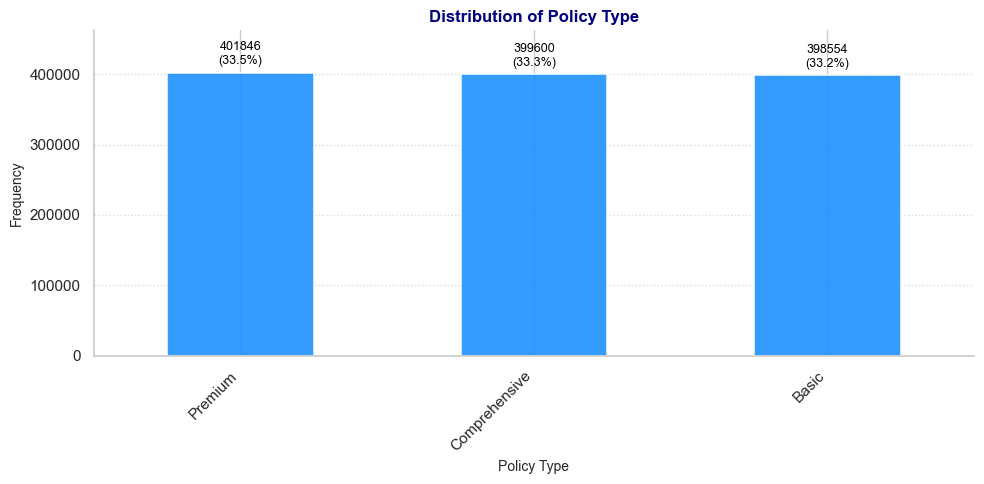

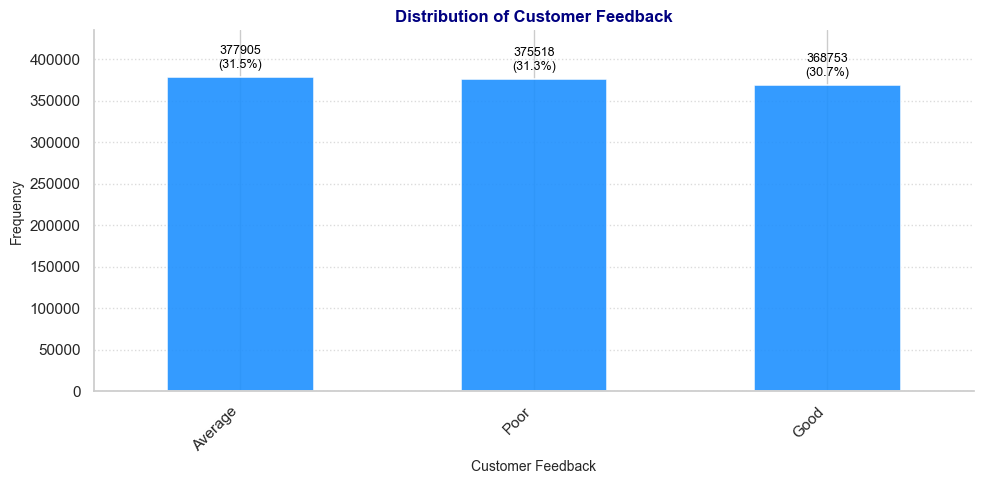

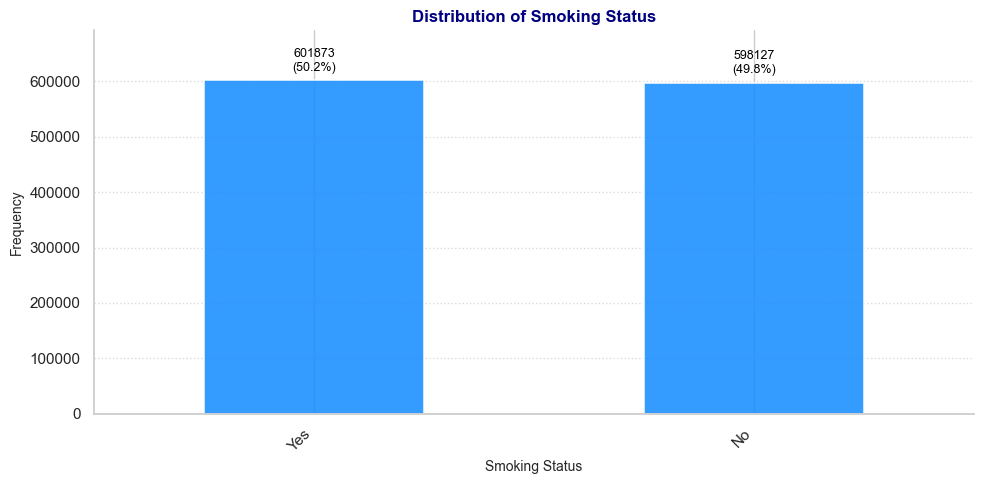

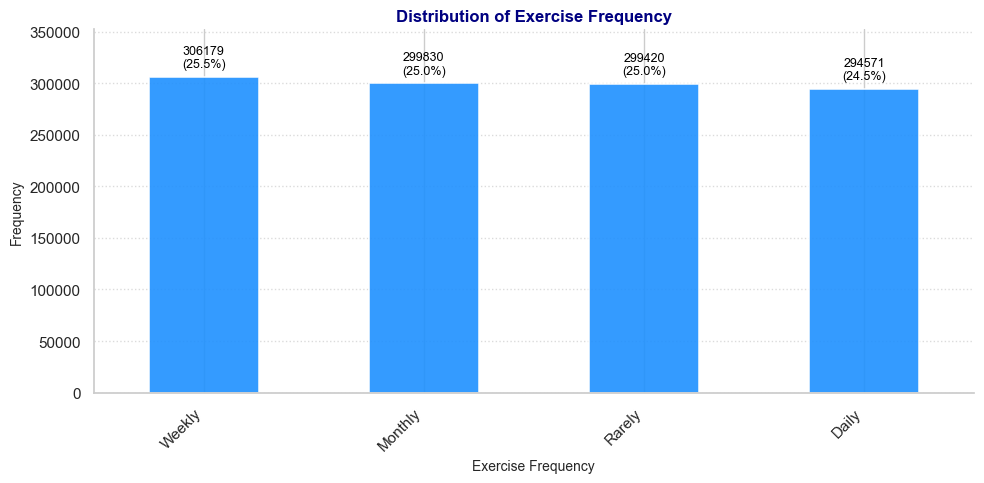

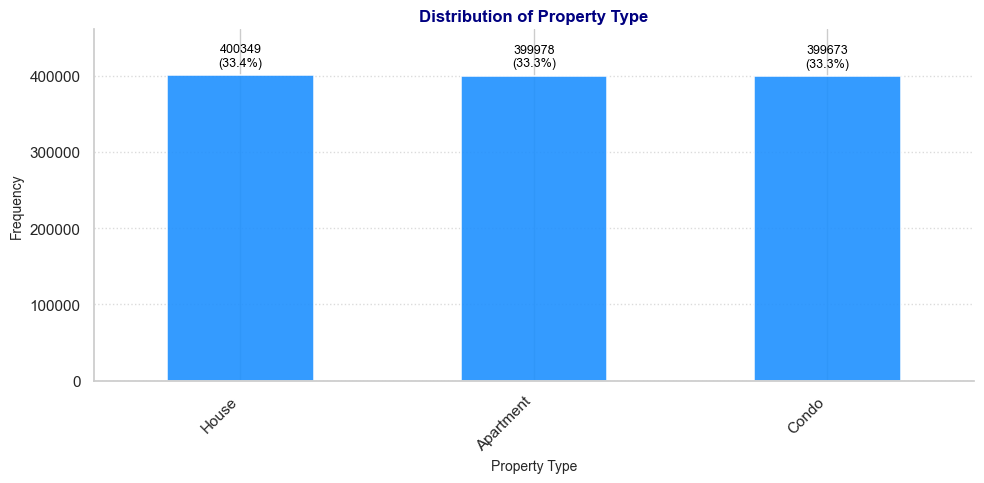

In [2202]:
# Drop unnecessary column
columns_object_values = columns_object_values.drop(columns=['Policy Start Date'])

# Generate bar plots for categorical columns
for col in columns_object_values.columns:
    plt.figure(figsize=(10, 5))
    
    # Get value counts and percentages
    counts = columns_object_values[col].value_counts()
    percentages = (counts / len(columns_object_values[col])) * 100
    
    # Create bar plot
    ax = counts.plot(kind="bar", 
                     color=MAIN_COLOR, 
                     edgecolor=EDGE_COLOR, 
                     linewidth=1.2, 
                     alpha=0.9, 
                     rot=0)
    
    # Add value labels on bars
    for i, (count, percentage) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.02 * max(counts),
                f"{count}\n({percentage:.1f}%)",
                ha='center', va='bottom', 
                color=TEXT_COLOR, 
                fontsize=9, 
                linespacing=1.2)
    
    # Apply formatting
    format_axes(ax, f"Distribution of {col}", col, "Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(counts) * 1.15)
    
    plt.tight_layout()
    plt.show()


## Time series values

In [2203]:
df_train['Policy Start Date'] = pd.to_datetime(df_train['Policy Start Date'])

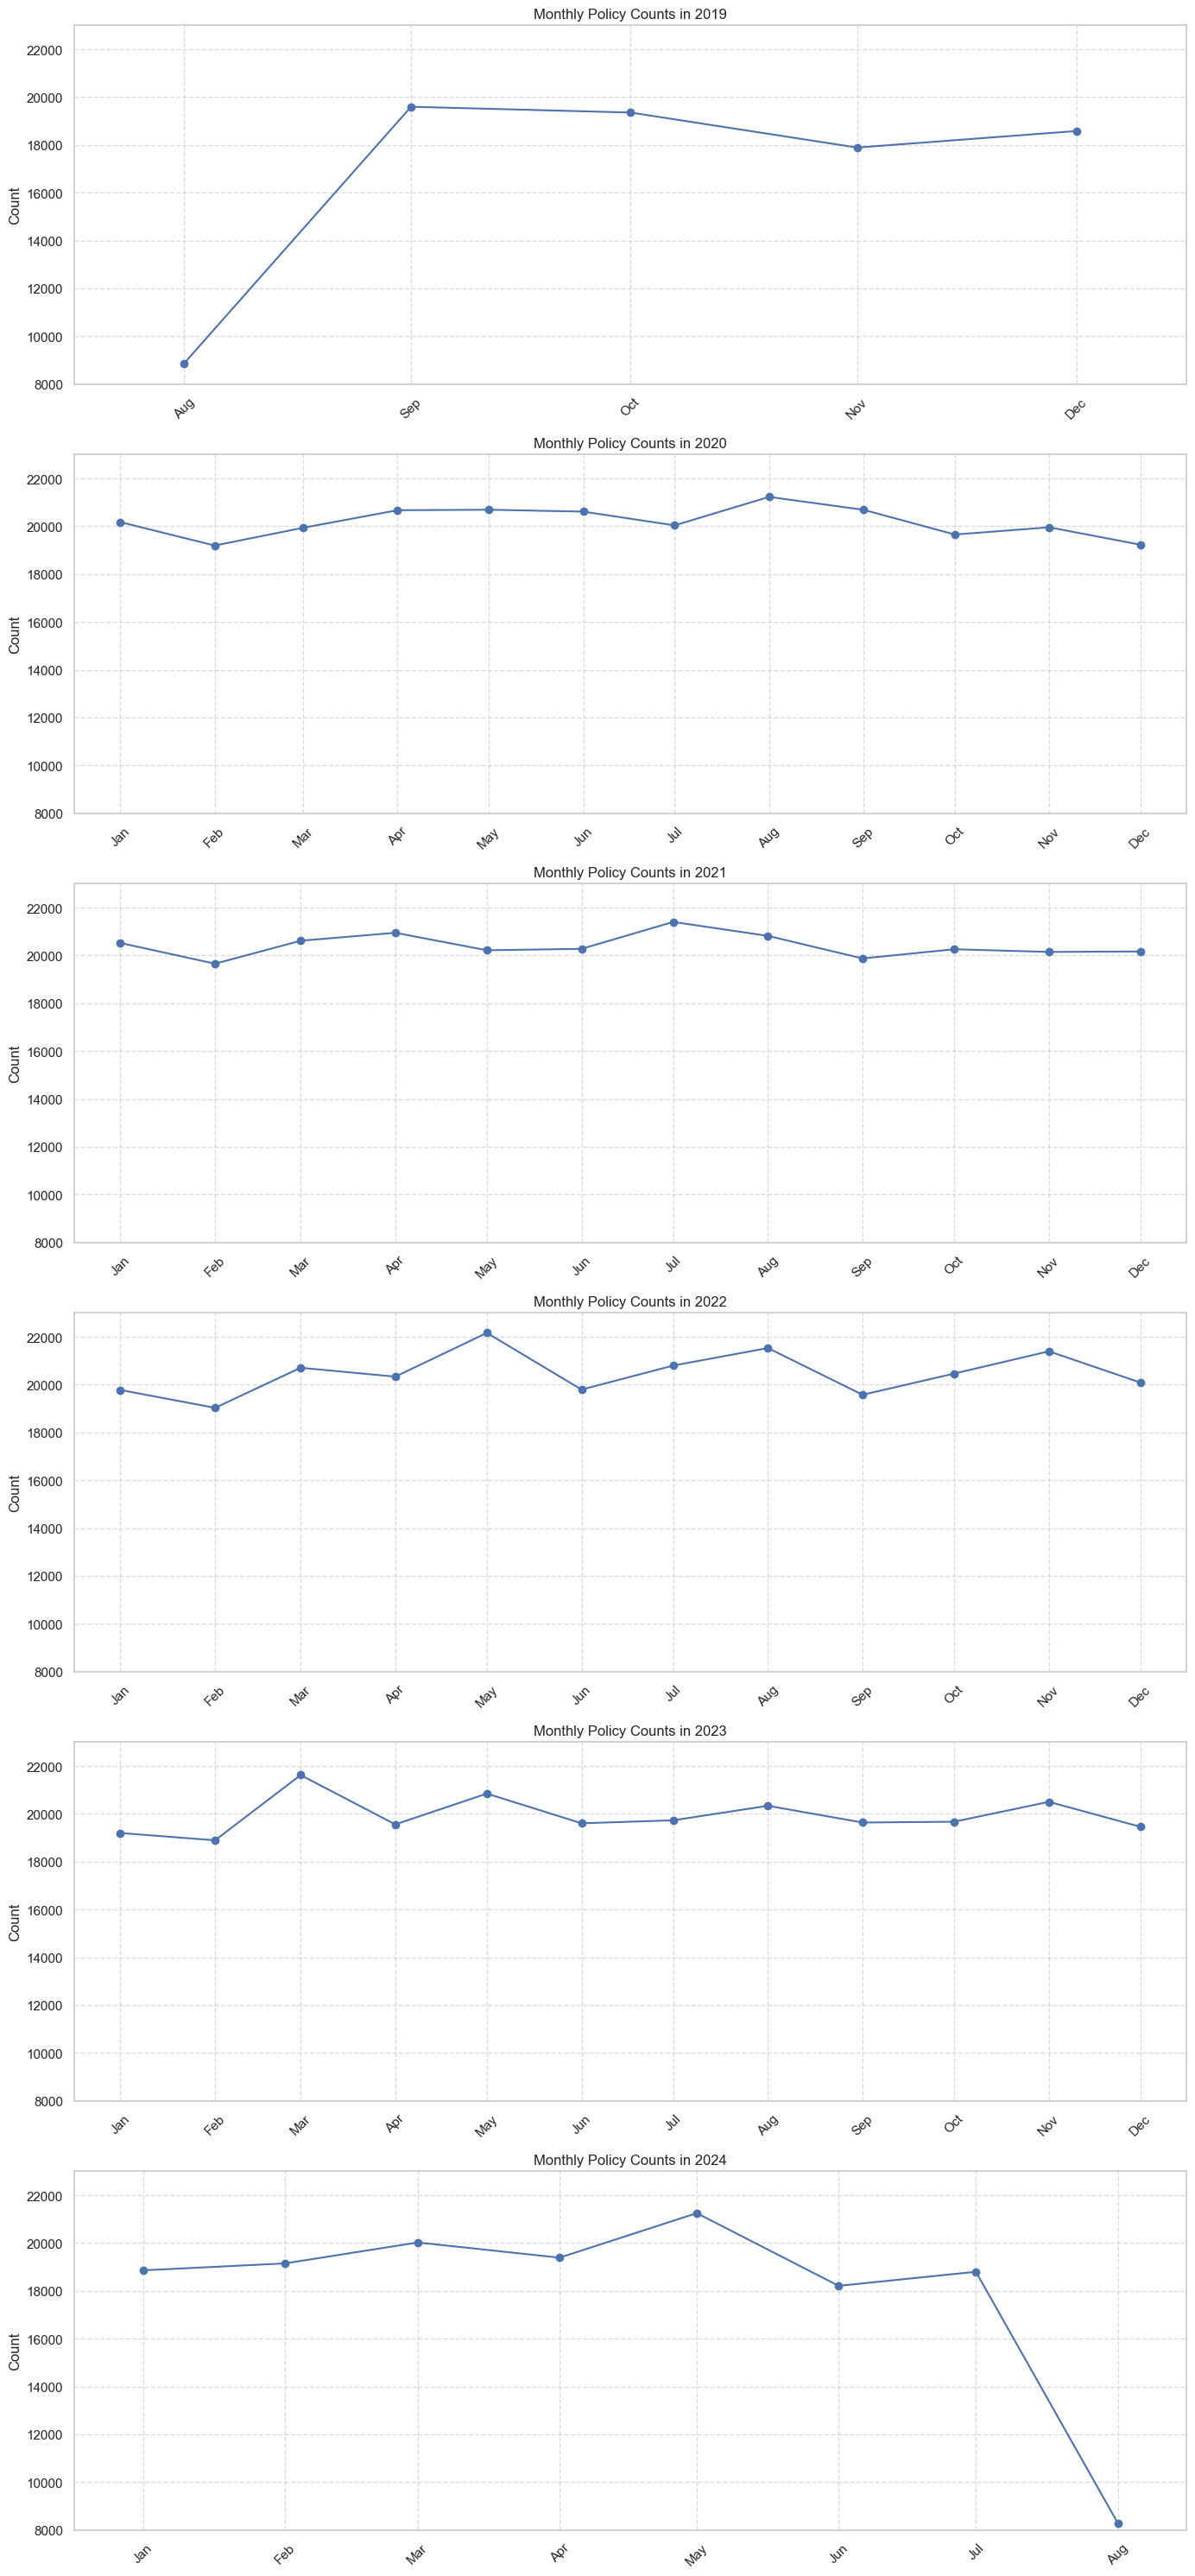

In [2204]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Załóżmy, że df_train ma kolumny 'Policy Start Date' i np. 'Other Columns'
# Grupa po roku i miesiącu bez ustawiania indeksu
df_train['Year'] = df_train['Policy Start Date'].dt.year
df_train['Month'] = df_train['Policy Start Date'].dt.month

# Liczymy liczbę polityk w każdym miesiącu
monthly_counts = df_train.groupby(['Year', 'Month']).size()

# Tworzymy wykresy dla każdego roku
years = monthly_counts.index.get_level_values('Year').unique()
n_years = len(years)

fig, axes = plt.subplots(n_years, 1, figsize=(14, 5 * n_years))

for i, year in enumerate(years):
    # Wybieramy dane dla konkretnego roku
    year_data = monthly_counts[monthly_counts.index.get_level_values('Year') == year]
    
    # Tworzymy daty z roku i miesiąca
    dates = pd.to_datetime(year_data.index.map(lambda x: f'{x[0]}-{x[1]:02d}-01'))
    
    # Określamy zakres danych
    start_date = dates.min()
    end_date = dates.max()
    
    # Tworzymy wykres
    axes[i].plot(dates, year_data.values, marker='o', linestyle='-')
    axes[i].set_title(f'Monthly Policy Counts in {year}')
    axes[i].set_ylabel('Count')
    axes[i].set_ylim(8000, 23000)
    
    # Ustawiamy zakres osi X na podstawie danych (nie całego roku)
    axes[i].set_xlim(start_date - pd.DateOffset(days=15), end_date + pd.DateOffset(days=15))
    
    # Formatowanie osi X
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [2205]:
df_train['Policy Start Date'] = pd.to_datetime(df_train['Policy Start Date'])

df_train['Year'] = df_train['Policy Start Date'].dt.year
df_train['Month'] = df_train['Policy Start Date'].dt.month
df_train['day_of_week'] = df_train['Policy Start Date'].dt.dayofweek  # 0 - Poniedziałek, 6 - Niedziela
# Function to assign time of day category
def get_time_of_day_category(time):
    hour = time.hour
    if 20 <= hour < 24 or 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 14:
        return 'Noon'
    elif 14 <= hour < 20:
        return 'Afternoon'

# Create a new column for time of day category
df_train['time_of_day_category'] = df_train['Policy Start Date'].apply(get_time_of_day_category)


## Correlation matrix

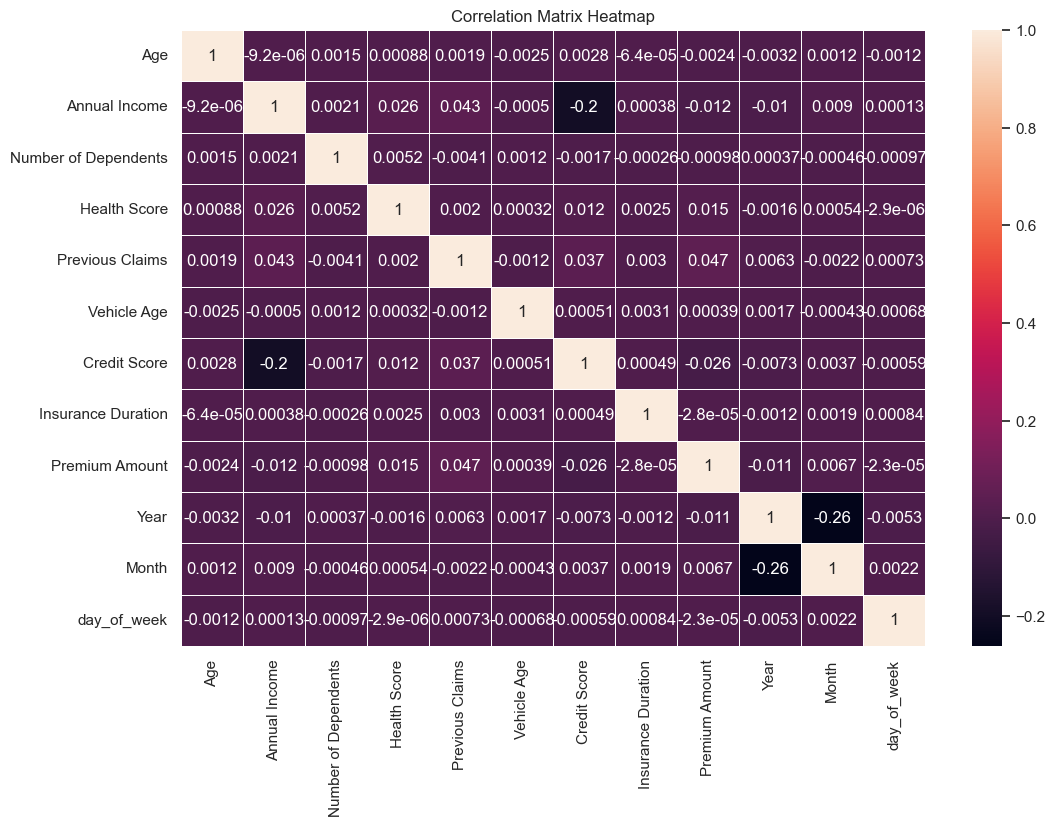

In [2206]:
df_numerical = df_train.select_dtypes(include=['number'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Train vs Test set comparison

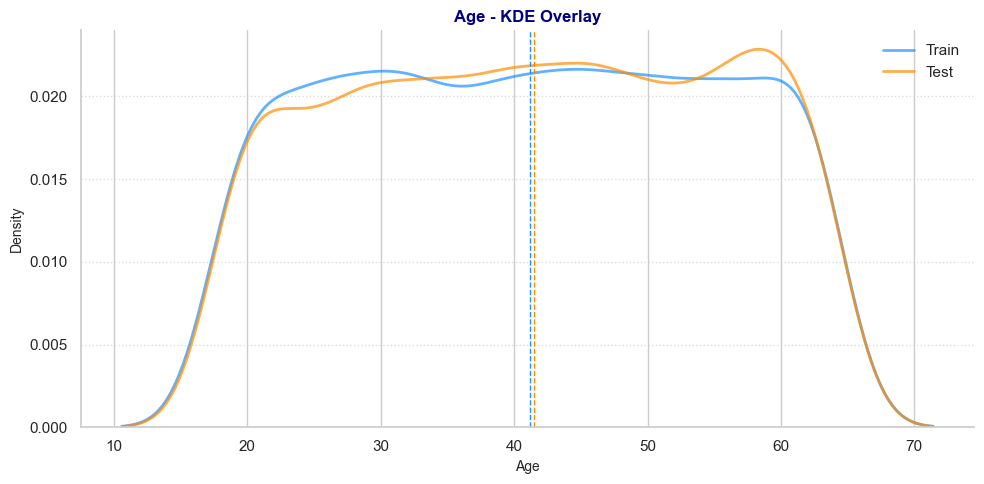

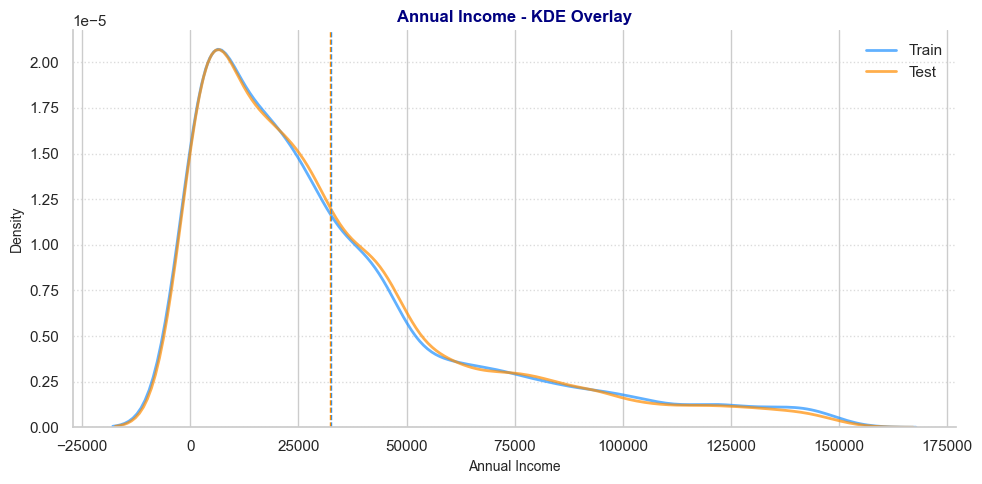

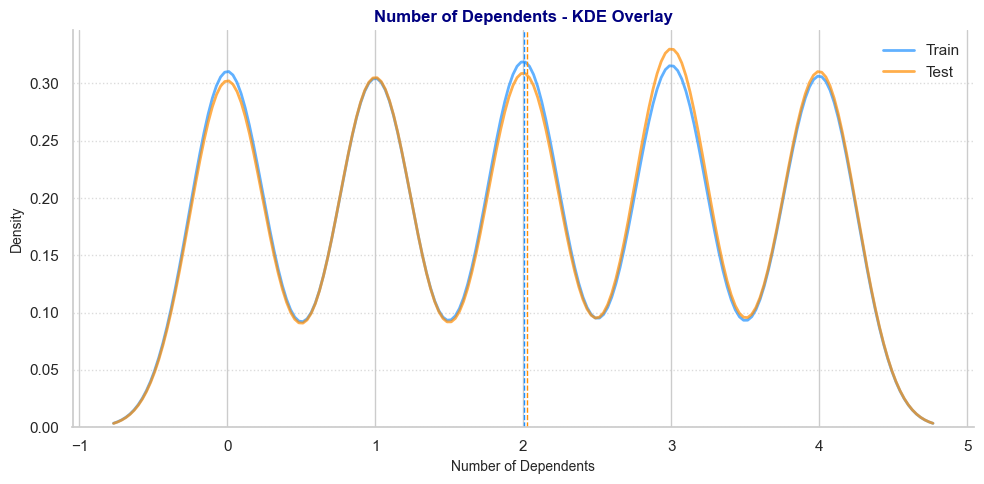

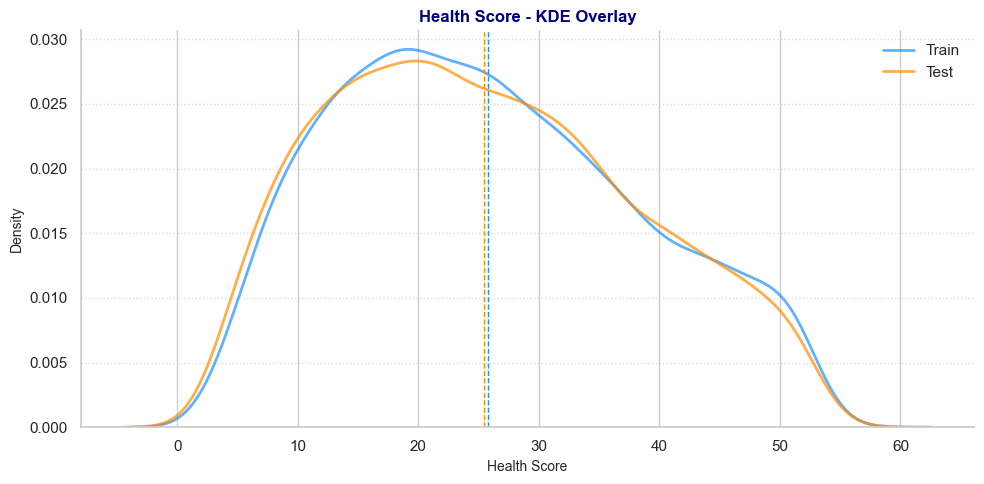

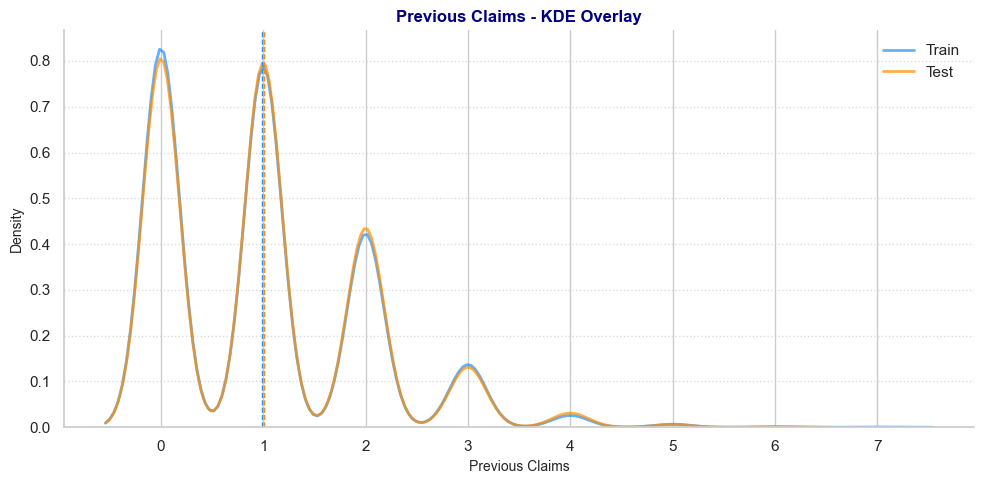

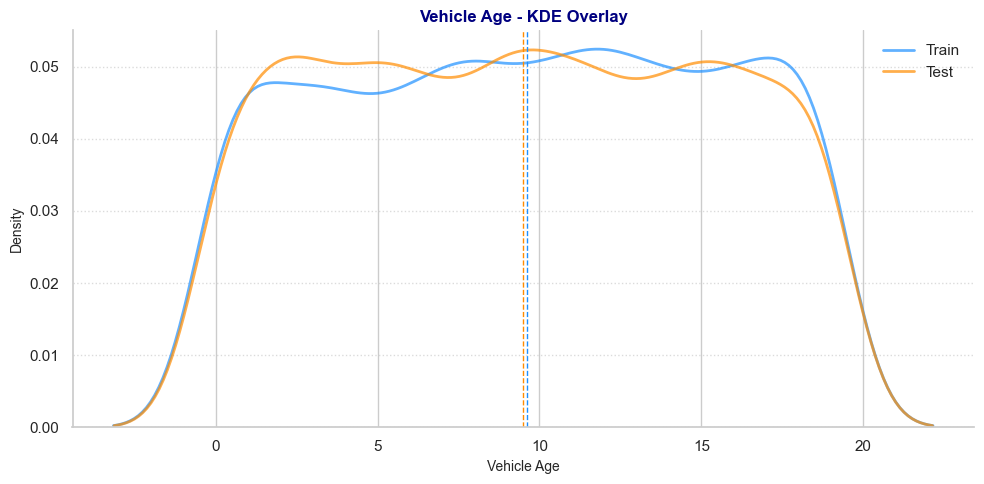

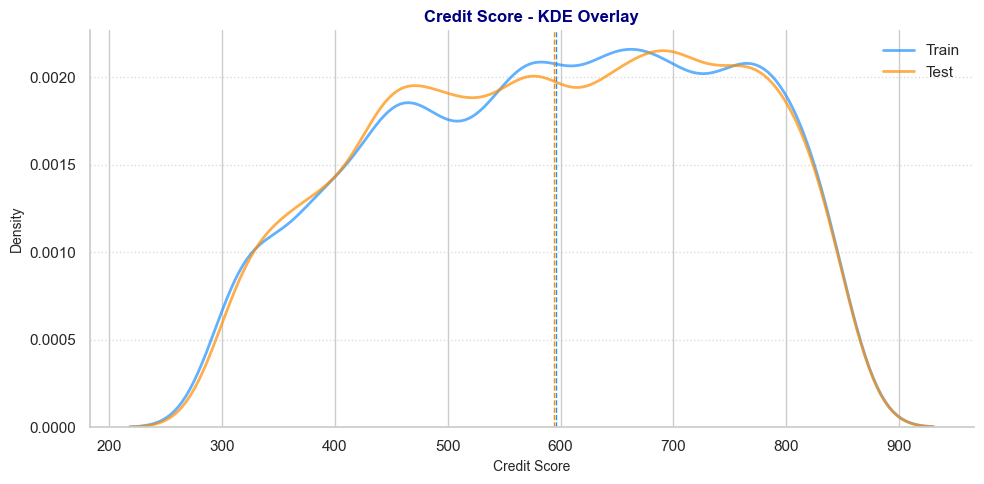

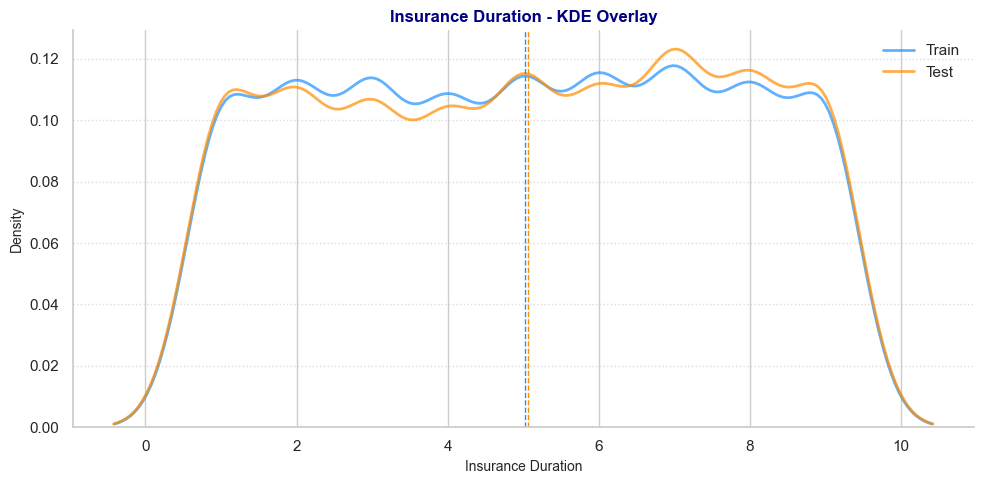

In [2207]:
from scipy.stats import ks_2samp

palette = {"Train": "dodgerblue", "Test": "darkorange"}

for col in columns_numerical_values.columns:
    plt.figure(figsize=(10, 5))

    sample_size = min(5000, len(df_train), len(df_test))
    train_sample = df_train[col].dropna().sample(sample_size, random_state=42)
    test_sample = df_test[col].dropna().sample(sample_size, random_state=42)

    # Overlay KDEs
    sns.kdeplot(train_sample, color=palette["Train"], label='Train', linewidth=2, alpha=0.7)
    sns.kdeplot(test_sample, color=palette["Test"], label='Test', linewidth=2, alpha=0.7)

    # Add mean/median lines
    plt.axvline(train_sample.mean(), color=palette["Train"], linestyle='--', linewidth=1)
    plt.axvline(test_sample.mean(), color=palette["Test"], linestyle='--', linewidth=1)

    format_axes(plt.gca(), f'{col} - KDE Overlay', col, 'Density')
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    plt.close()

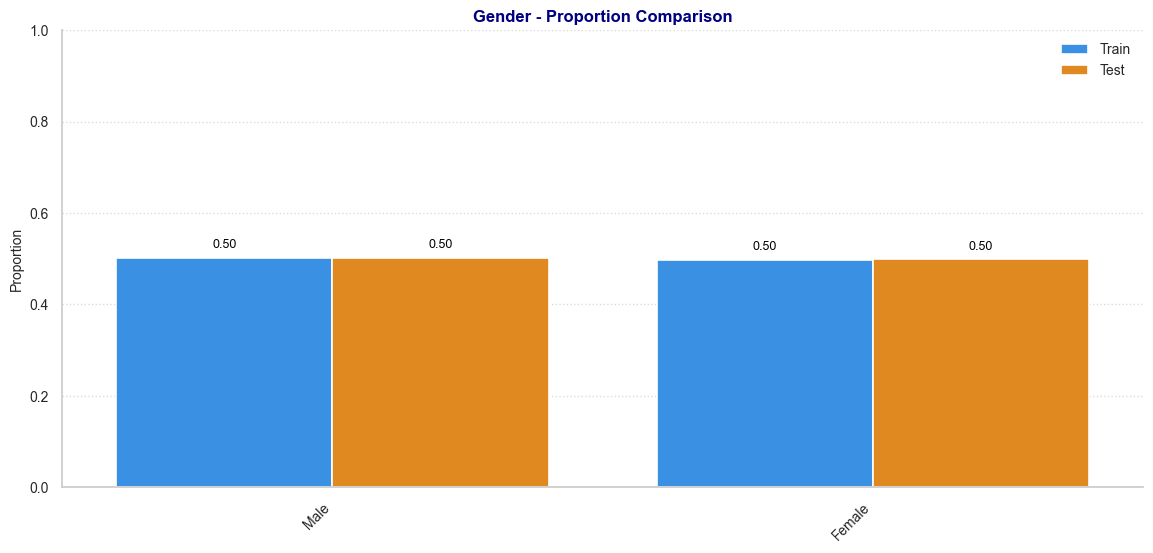

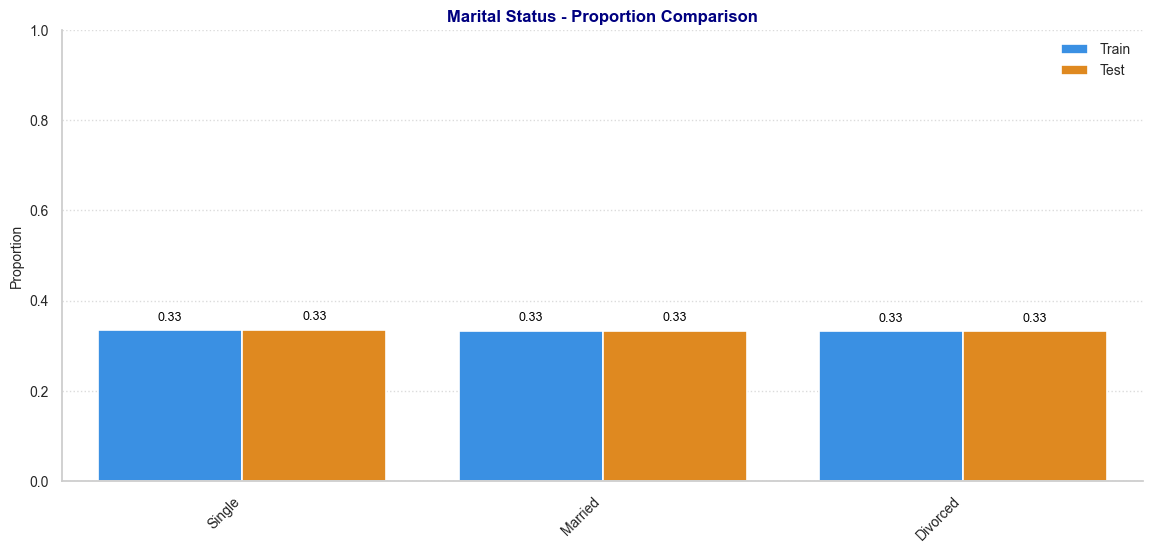

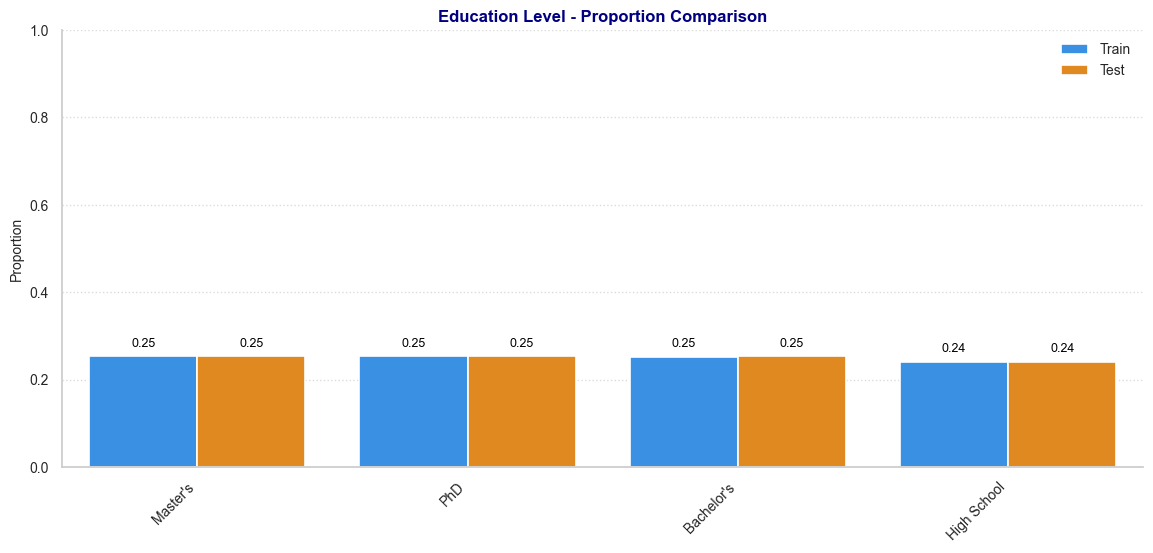

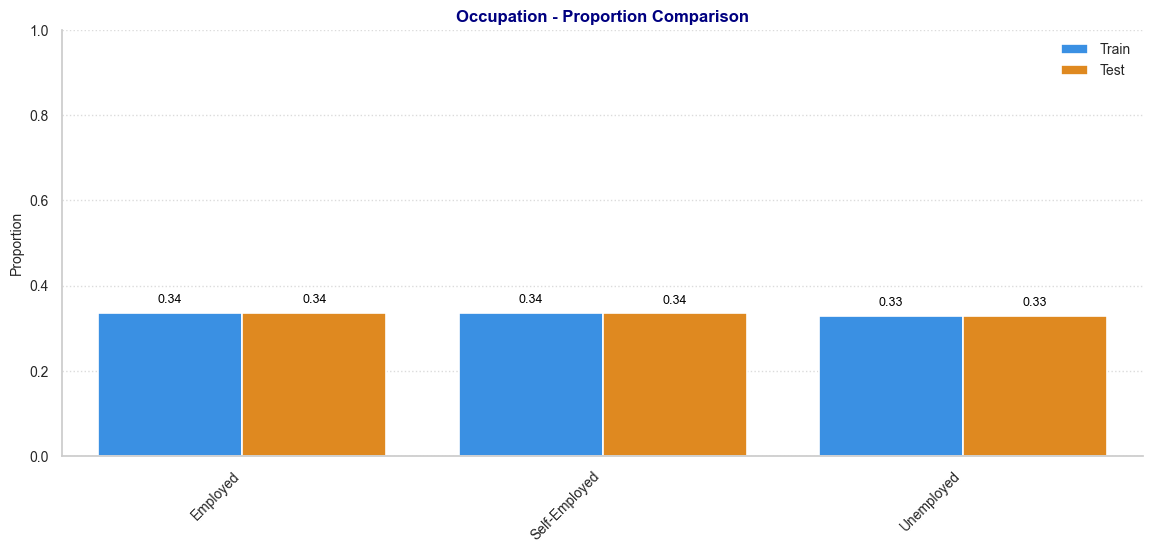

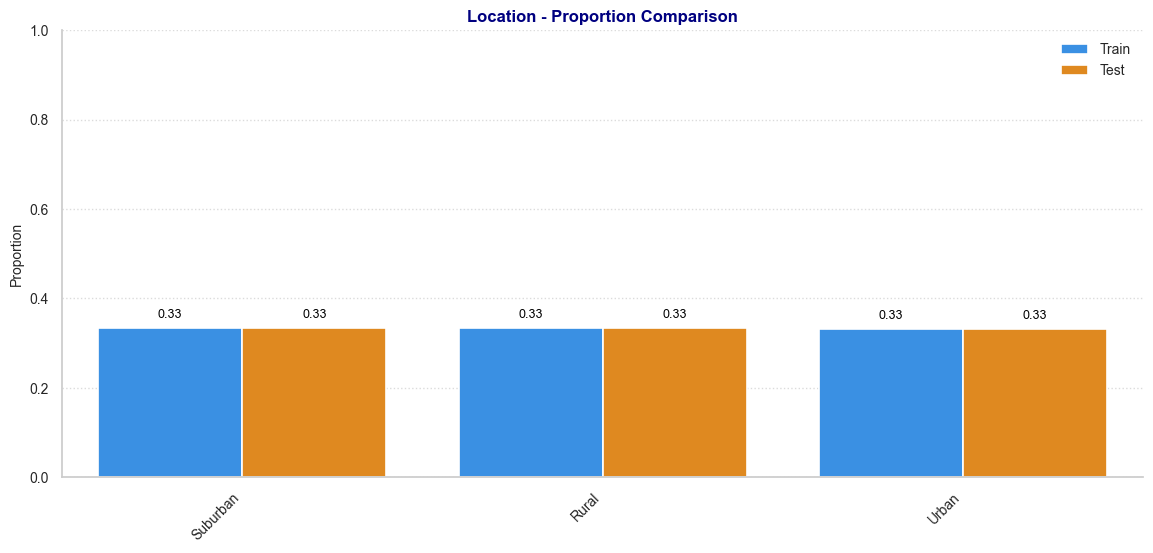

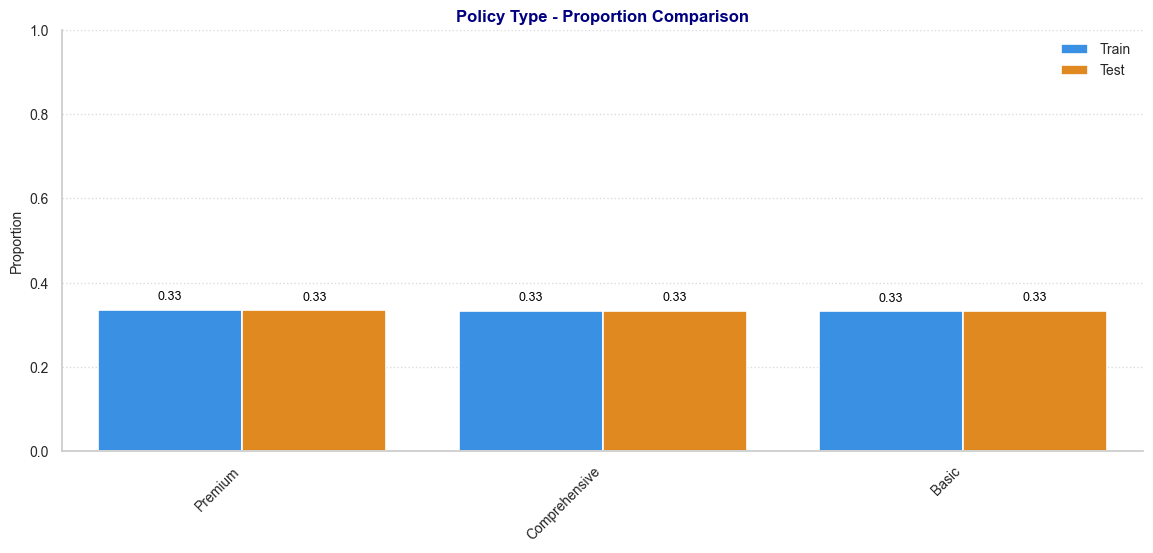

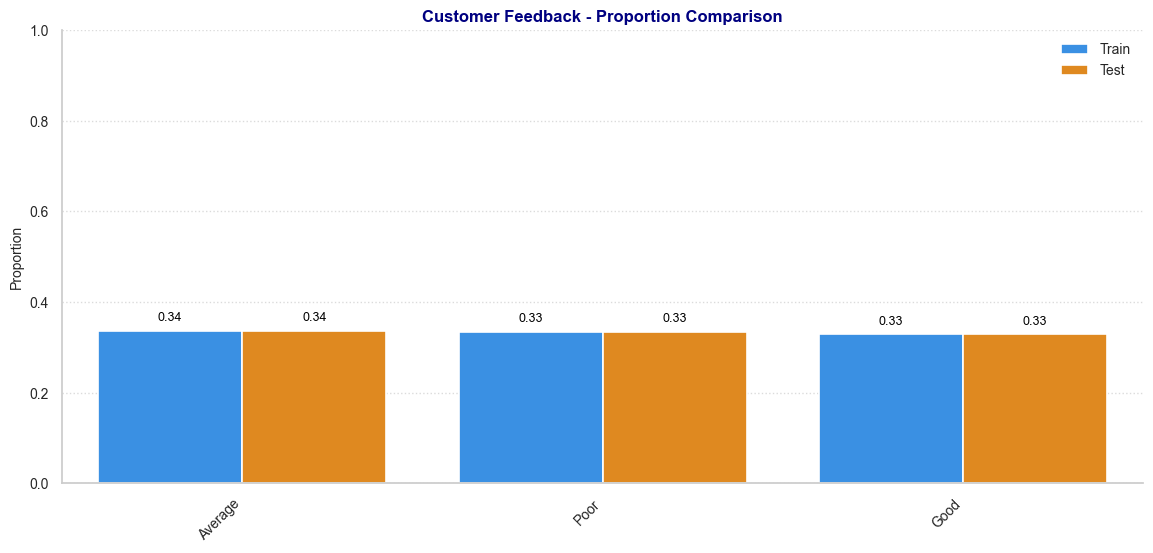

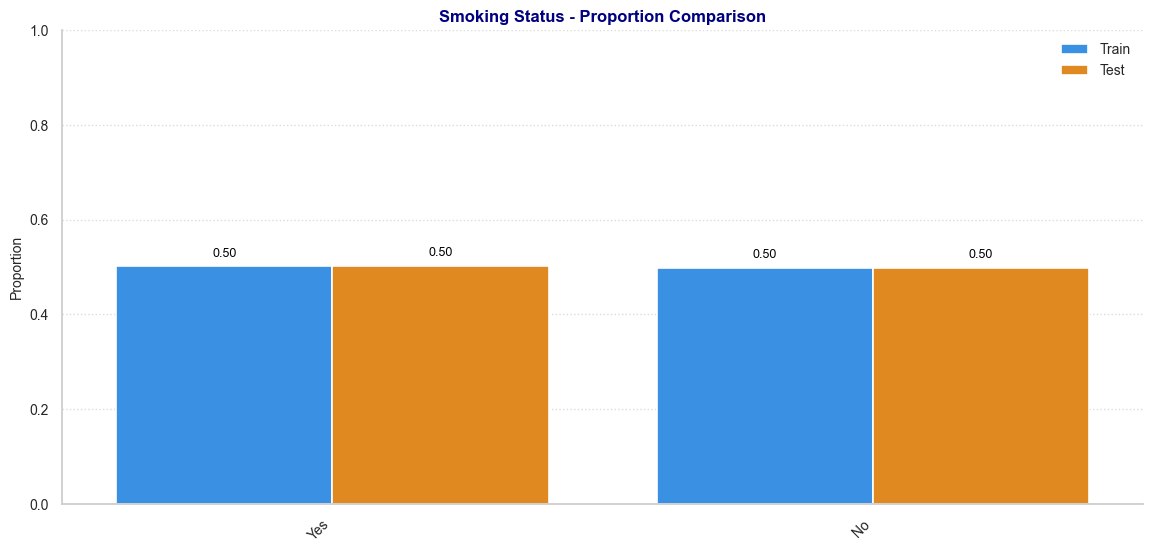

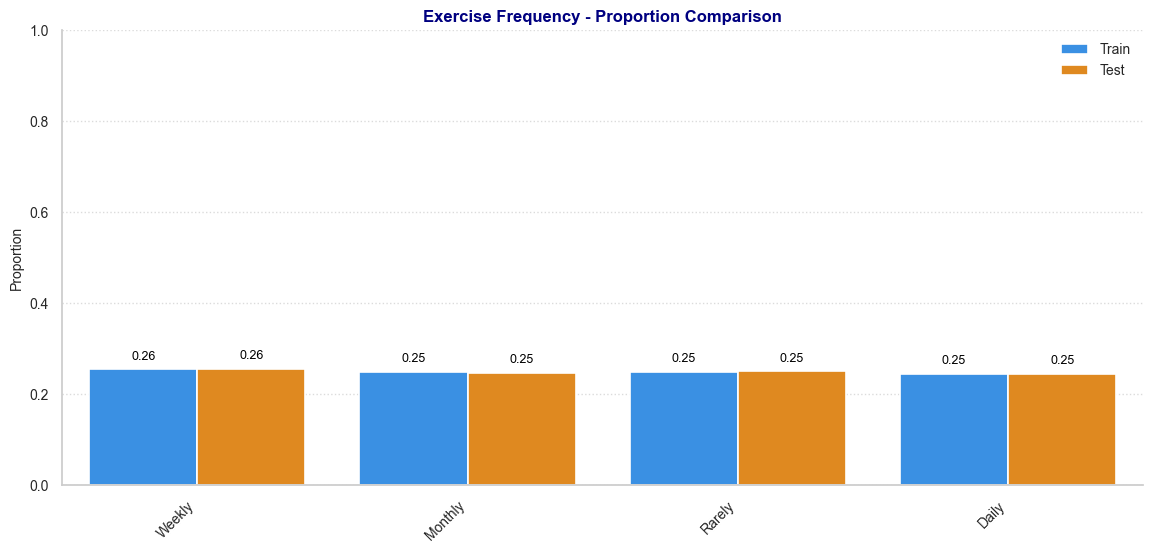

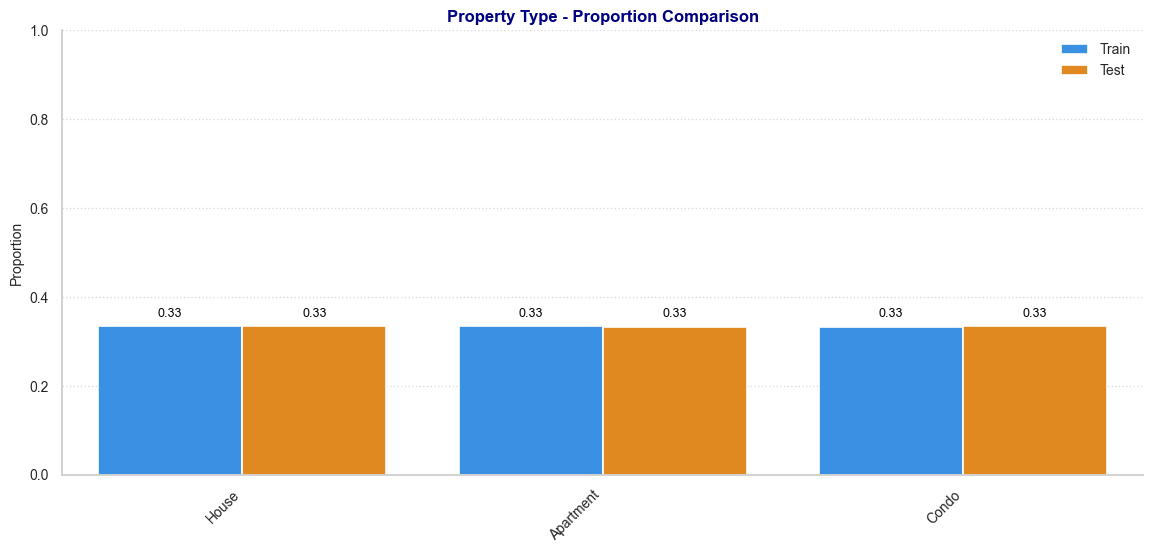

In [2208]:
# Generate bar plots for categorical columns with proportions comparison
for col in columns_object_values.columns:
    plt.figure(figsize=(12, 6))
    
    train_prop = df_train[col].value_counts(normalize=True).reset_index()
    train_prop.columns = ['value', 'proportion']
    train_prop['dataset'] = 'Train'
    
    test_prop = df_test[col].value_counts(normalize=True).reset_index()
    test_prop.columns = ['value', 'proportion']
    test_prop['dataset'] = 'Test'
    
    temp_df = pd.concat([train_prop, test_prop], axis=0)
    
    ax = sns.barplot(
        data=temp_df,
        x='value',           
        y='proportion',      
        hue='dataset',
        palette=[MAIN_COLOR, TERTIARY_COLOR],
        edgecolor=EDGE_COLOR,
        linewidth=1.2
    )
    
    ax.set_ylim(0, 1)
    for p in ax.patches:
        height = p.get_height()
        if height > 0.05:
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color=TEXT_COLOR,
                        xytext=(0, 5), textcoords='offset points')
    
    format_axes(ax, f'{col} - Proportion Comparison', '', 'Proportion')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='', frameon=False, fontsize=10)
    plt.tight_layout(pad=2.0)
    plt.show()
    plt.close()

# ML models

## Feature engineering

In [2209]:
df_train.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Year', 'Month', 'day_of_week',
       'time_of_day_category'],
      dtype='object')

In [2210]:
df_train['month_sin'] = np.sin(2 * np.pi * df_train['Month']   / 12)
df_train['month_cos'] = np.cos(2 * np.pi * df_train['Month']   / 12)
df_train['dow_sin'] = np.sin(2 * np.pi * df_train['day_of_week'] / 7)
df_train['dow_cos'] = np.cos(2 * np.pi * df_train['day_of_week'] / 7)
df_train['quarter'] = df_train['Policy Start Date'].dt.quarter
min_year = df_train['Year'].min()
max_year = df_train['Year'].max()
df_train['Year_sin'] = np.sin(2 * np.pi * (df_train['Year'] - min_year) / (max_year - min_year))
df_train['Year_cos'] = np.cos(2 * np.pi * (df_train['Year'] - min_year) / (max_year - min_year))

In [2211]:
df_train['Income_per_Dependent'] = df_train['Annual Income'] / (df_train['Number of Dependents'] + 1)
df_train['Income_per_Year'] = df_train['Annual Income'] / (df_train['Age'] + 1)
df_train['Claims_per_Year'] = df_train['Previous Claims'] / (df_train['Insurance Duration'] + 1)

In [2212]:
means = df_train.groupby('Education Level')['Premium Amount'].mean()
df_train['Edu_target_enc'] = df_train['Education Level'].map(means)

In [2213]:
for col in columns_numerical_values:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [2214]:
object_types_input = {'Marital Status': 'Married', 'Customer Feedback': 'Average', 'Occupation':'Employed'}
df_train.fillna(object_types_input, inplace=True)

In [2215]:
edu_order = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df_train['Education Level'] = df_train['Education Level'].map(edu_order)
pol_type_order = {"Basic":0, "Comprehensive": 1, "Premium": 2}
df_train['Policy Type'] = df_train['Policy Type'].map(pol_type_order)
cust_order = {"Poor":0, "Average":1, "Good":2}
df_train['Customer Feedback'] = df_train['Customer Feedback'].map(cust_order)
exercise_order = {"Daily": 0, "Weekly":1, "Monthly":2, "Rarely":3}
df_train["Exercise Frequency"] = df_train["Exercise Frequency"].map(exercise_order)

In [2216]:
pd.set_option('display.max_columns', None)
df_train

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Year,Month,day_of_week,time_of_day_category,month_sin,month_cos,dow_sin,dow_cos,quarter,Year_sin,Year_cos,Income_per_Dependent,Income_per_Year,Claims_per_Year,Edu_target_enc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,1,Self-Employed,22.598761,Urban,2,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,0,No,1,House,2869.0,2023,12,5,Afternoon,-2.449294e-16,1.000000e+00,-0.974928,-0.222521,4,-9.510565e-01,0.309017,5024.5,502.450000,0.333333,1102.698438
1,39.0,Female,31678.0,Divorced,3.0,2,Employed,15.569731,Rural,1,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,1,Yes,2,House,1483.0,2023,6,0,Afternoon,1.224647e-16,-1.000000e+00,0.000000,1.000000,2,-9.510565e-01,0.309017,7919.5,791.950000,0.333333,1102.113989
2,23.0,Male,25602.0,Divorced,3.0,0,Self-Employed,47.177549,Suburban,2,1.0,14.0,595.0,3.0,2023-09-30 15:21:39.221386,2,Yes,1,House,567.0,2023,9,5,Afternoon,-1.000000e+00,-1.836970e-16,-0.974928,-0.222521,3,-9.510565e-01,0.309017,6400.5,1066.750000,0.250000,1104.787490
3,21.0,Male,141855.0,Married,2.0,1,Employed,10.938144,Rural,0,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,0,Yes,0,Apartment,765.0,2024,6,2,Afternoon,1.224647e-16,-1.000000e+00,0.974928,-0.222521,2,-2.449294e-16,1.000000,47285.0,6447.954545,0.500000,1102.698438
4,21.0,Male,39651.0,Single,1.0,1,Self-Employed,20.376094,Rural,2,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,0,Yes,1,House,2022.0,2021,12,2,Afternoon,-2.449294e-16,1.000000e+00,0.974928,-0.222521,4,5.877853e-01,-0.809017,19825.5,1802.318182,0.000000,1102.698438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,2,Unemployed,13.772907,Urban,2,1.0,5.0,372.0,3.0,2023-05-03 15:21:39.257696,0,No,0,Apartment,1303.0,2023,5,2,Afternoon,5.000000e-01,-8.660254e-01,0.974928,-0.222521,2,-9.510565e-01,0.309017,27316.0,738.270270,NaN,1102.113989
1199996,54.0,Male,35786.0,Divorced,2.0,2,Self-Employed,11.483482,Rural,1,1.0,10.0,597.0,4.0,2022-09-10 15:21:39.134960,0,No,1,Apartment,821.0,2022,9,5,Afternoon,-1.000000e+00,-1.836970e-16,-0.974928,-0.222521,3,-5.877853e-01,-0.809017,NaN,650.654545,NaN,1102.113989
1199997,19.0,Male,51884.0,Divorced,0.0,2,Employed,14.724469,Suburban,0,0.0,19.0,595.0,6.0,2021-05-25 15:21:39.106582,2,No,2,Condo,371.0,2021,5,1,Afternoon,5.000000e-01,-8.660254e-01,0.781831,0.623490,2,5.877853e-01,-0.809017,51884.0,2594.200000,0.000000,1102.113989


In [2217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 35 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Age                   1200000 non-null  float64       
 1   Gender                1200000 non-null  object        
 2   Annual Income         1200000 non-null  float64       
 3   Marital Status        1200000 non-null  object        
 4   Number of Dependents  1200000 non-null  float64       
 5   Education Level       1200000 non-null  int64         
 6   Occupation            1200000 non-null  object        
 7   Health Score          1200000 non-null  float64       
 8   Location              1200000 non-null  object        
 9   Policy Type           1200000 non-null  int64         
 10  Previous Claims       1200000 non-null  float64       
 11  Vehicle Age           1200000 non-null  float64       
 12  Credit Score          1200000 non-null  float64

In [2218]:
df_train = df_train.drop(columns = 'Policy Start Date')

In [2219]:
columns_object_values = columns_object_values.columns.tolist()  # This creates a list
to_remove = ['Education Level', 'Policy Type', 'Customer Feedback', 'Exercise Frequency']
columns_object_values = [col for col in columns_object_values if col not in to_remove]
columns_object_values.append('time_of_day_category') 

# Apply one-hot encoding
df_train = pd.get_dummies(df_train, 
                          columns=columns_object_values,
                          drop_first=True,
                          dtype=int)


In [2220]:
columns_object_values

['Gender',
 'Marital Status',
 'Occupation',
 'Location',
 'Smoking Status',
 'Property Type',
 'time_of_day_category']

In [2221]:
X = df_train.drop(columns=['Premium Amount', 'Year', 'Month', 'day_of_week'])
y = df_train['Premium Amount']

In [2222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2223]:
obj_cols = X_train.select_dtypes(include='object').columns
print(obj_cols)

Index([], dtype='object')


In [2224]:
from sklearn.preprocessing import QuantileTransformer

y_transformer = QuantileTransformer(output_distribution='normal')
y_transformer.fit(y_train.values.reshape(-1, 1))

y_train_trans = y_transformer.transform(y_train.values.reshape(-1, 1)).ravel()
y_test_trans = y_transformer.transform(y_test.values.reshape(-1, 1)).ravel()

In [2225]:
# import optuna
# import xgboost as xg
# import mlflow
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_squared_log_error
# from sklearn.model_selection import KFold

# # MLflow setup
# mlflow.set_tracking_uri("http://127.0.0.1:8080")
# mlflow.set_experiment("optuna_xgb")
# def objective(trial):
#     params = {
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'eta': trial.suggest_float('eta', 0.01, 0.3, log=True),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 1e-8, 5.0, log=True),
#         'alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True),
#         'lambda': trial.suggest_float('lambda', 1e-8, 10.0, log=True),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'objective': 'reg:squarederror',
#         'n_jobs': -1,
#     }

#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     rmsle_scores = []
#     neg_rmsle_sum = 0.0

#     for train_idx, val_idx in kf.split(X_train):
#         X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#         y_tr_trans = y_train_trans[train_idx]
#         y_val_trans = y_train_trans[val_idx]
#         y_val = y_train.iloc[val_idx].values

#         dtrain = xg.DMatrix(X_tr, label=y_tr_trans)
#         dval = xg.DMatrix(X_val, label=y_val_trans)

#         model = xg.train(
#             params,
#             dtrain,
#             num_boost_round=1000,
#             early_stopping_rounds=50,
#             evals=[(dval, 'eval')],
#             verbose_eval=False
#         )

#         preds_trans = model.predict(xg.DMatrix(X_val))
#         preds = y_transformer.inverse_transform(preds_trans.reshape(-1, 1)).ravel()
#         preds = np.maximum(preds, 0)

#         try:
#             rmsle = np.sqrt(mean_squared_log_error(y_val, preds))
#         except ValueError:
#             rmsle = float('inf')

#         if rmsle < 0:
#             neg_rmsle_sum += rmsle

#         rmsle_scores.append(rmsle)

#     final_score = np.mean(rmsle_scores)
#     trial.set_user_attr("neg_rmsle_sum", neg_rmsle_sum)
#     return final_score


# if __name__ == '__main__':
#     with mlflow.start_run(run_name="Optuna_Study"):
#         study = optuna.create_study(direction='minimize')
#         study.optimize(objective, n_trials=50)

#         best_params = study.best_params
#         best_value = study.best_value
#         mlflow.log_params(best_params)
#         mlflow.log_metric('best_rmsle', best_value)

#         # Sum of all negative RMSLEs across trials
#         total_neg_rmsle = sum(
#             t.user_attrs.get("neg_rmsle_sum", 0.0) for t in study.trials
#         )
#         mlflow.log_metric("sum_negative_rmsle", total_neg_rmsle)

#         print("Best RMSLE: {:.4f}".format(best_value))
#         print("Best parameters:")
#         for key, value in best_params.items():
#             print(f"  {key}: {value}")

In [2226]:
from sklearn.metrics import mean_squared_log_error
import xgboost as xg
dtrain_full = xg.DMatrix(X_train, label=y_train_trans)
best_params = {
    "max_depth": 9,
    "eta": 0.010210644111991293,
    "subsample": 0.9590370210705078,
    "colsample_bytree": 0.9550080187777964,
    "gamma": 3.0685315773707374e-08,
    "alpha": 1.0457292034153025e-08,
    "lambda": 1.6174048282694194e-08,
    "min_child_weight": 2,
    'objective': 'reg:squarederror',
    'n_jobs': -1,
}

final_model = xg.train(
    params=best_params,
    dtrain=dtrain_full,
    num_boost_round=1000,
    early_stopping_rounds=50,
    evals=[(dtrain_full, 'train')],
    verbose_eval=10
)

preds_trans = final_model.predict(dtrain_full)
preds = y_transformer.inverse_transform(preds_trans.reshape(-1, 1)).ravel()

# TRAIN RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_train, preds))
print(f"Train RMSLE: {rmsle}")

# TEST RMSLE
dtest = xg.DMatrix(X_test)  # <--- Konwersja DataFrame na DMatrix
preds_trans_test = final_model.predict(dtest)  # <--- Użyj dtest zamiast X_test
preds_test = y_transformer.inverse_transform(preds_trans_test.reshape(-1, 1)).ravel()
preds_test = np.maximum(preds_test, 0)  # Zapobieganie wartościom ujemnym
test_rmsle = np.sqrt(mean_squared_log_error(y_test, preds_test))
print(f"Test RMSLE: {test_rmsle}")


[0]	train-rmse:1.03070
[10]	train-rmse:1.02565
[20]	train-rmse:1.02131
[30]	train-rmse:1.01727
[40]	train-rmse:1.01407
[50]	train-rmse:1.01155
[60]	train-rmse:1.00944
[70]	train-rmse:1.00729
[80]	train-rmse:1.00555
[90]	train-rmse:1.00404
[100]	train-rmse:1.00271
[110]	train-rmse:1.00150
[120]	train-rmse:1.00043
[130]	train-rmse:0.99958
[140]	train-rmse:0.99874
[150]	train-rmse:0.99797
[160]	train-rmse:0.99732
[170]	train-rmse:0.99667
[180]	train-rmse:0.99607
[190]	train-rmse:0.99552
[200]	train-rmse:0.99498
[210]	train-rmse:0.99450
[220]	train-rmse:0.99403
[230]	train-rmse:0.99355
[240]	train-rmse:0.99310
[250]	train-rmse:0.99266
[260]	train-rmse:0.99224
[270]	train-rmse:0.99185
[280]	train-rmse:0.99144
[290]	train-rmse:0.99102
[300]	train-rmse:0.99065
[310]	train-rmse:0.99024
[320]	train-rmse:0.98987
[330]	train-rmse:0.98950
[340]	train-rmse:0.98914
[350]	train-rmse:0.98877
[360]	train-rmse:0.98841
[370]	train-rmse:0.98805
[380]	train-rmse:0.98769
[390]	train-rmse:0.98735
[400]	train

In [2227]:
importance_dict = final_model.get_score(importance_type='gain')  
importance_series = pd.Series(importance_dict).sort_values(ascending=False)
print(importance_series)

Previous Claims             65.995369
Year_cos                    24.532572
Health Score                21.141071
Year_sin                    17.777683
Credit Score                17.657919
Annual Income               17.159927
Customer Feedback           15.610570
Income_per_Year             12.390729
Income_per_Dependent        10.497802
Claims_per_Year              8.392055
Marital Status_Married       7.555318
month_sin                    7.218613
quarter                      6.955407
month_cos                    6.791186
Insurance Duration           6.694890
Edu_target_enc               6.650929
dow_sin                      6.638108
Occupation_Unemployed        6.605708
Marital Status_Single        6.577114
Vehicle Age                  6.575997
Age                          6.567995
Occupation_Self-Employed     6.559406
dow_cos                      6.474607
Location_Urban               6.464523
Location_Suburban            6.375484
Gender_Male                  6.371581
Property Typ

## Choose the most importance features

In [2228]:
selected_features = [
    "Previous Claims",
    "Year_cos",
    "Health Score",
    "Annual Income",
    "Year_sin",
    "Credit Score",
    "Customer Feedback",
    "Income_per_Year",
    "Income_per_Dependent",
    "Claims_per_Year",
    "Marital Status_Married"
]


X_train_selected = X_train[selected_features]
dtrain_full = xg.DMatrix(X_train_selected, label=y_train_trans)

final_model = xg.train(
    params=best_params,
    dtrain=dtrain_full,
    num_boost_round=1000,
    early_stopping_rounds=50,
    evals=[(dtrain_full, 'train')],
    verbose_eval=10
)

preds_trans = final_model.predict(dtrain_full)
preds = y_transformer.inverse_transform(preds_trans.reshape(-1, 1)).ravel()
# preds = np.maximum(preds, 0)

# TRAIN RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_train, preds))
print(f"Train RMSLE: {rmsle}")

# TEST RMSLE
dtest = xg.DMatrix(X_test[selected_features])  # <--- Konwersja DataFrame na DMatrix
preds_trans_test = final_model.predict(dtest)  # <--- Użyj dtest zamiast X_test
preds_test = y_transformer.inverse_transform(preds_trans_test.reshape(-1, 1)).ravel()
preds_test = np.maximum(preds_test, 0)  # Zapobieganie wartościom ujemnym
test_rmsle = np.sqrt(mean_squared_log_error(y_test, preds_test))
print(f"Test RMSLE: {test_rmsle}")

[0]	train-rmse:1.03077
[10]	train-rmse:1.02558
[20]	train-rmse:1.02151
[30]	train-rmse:1.01779
[40]	train-rmse:1.01461
[50]	train-rmse:1.01195
[60]	train-rmse:1.00978
[70]	train-rmse:1.00790
[80]	train-rmse:1.00638
[90]	train-rmse:1.00492
[100]	train-rmse:1.00368
[110]	train-rmse:1.00259
[120]	train-rmse:1.00165
[130]	train-rmse:1.00078
[140]	train-rmse:1.00001
[150]	train-rmse:0.99931
[160]	train-rmse:0.99865
[170]	train-rmse:0.99809
[180]	train-rmse:0.99757
[190]	train-rmse:0.99707
[200]	train-rmse:0.99661
[210]	train-rmse:0.99617
[220]	train-rmse:0.99575
[230]	train-rmse:0.99534
[240]	train-rmse:0.99494
[250]	train-rmse:0.99456
[260]	train-rmse:0.99420
[270]	train-rmse:0.99386
[280]	train-rmse:0.99352
[290]	train-rmse:0.99318
[300]	train-rmse:0.99286
[310]	train-rmse:0.99254
[320]	train-rmse:0.99221
[330]	train-rmse:0.99191
[340]	train-rmse:0.99160
[350]	train-rmse:0.99130
[360]	train-rmse:0.99101
[370]	train-rmse:0.99072
[380]	train-rmse:0.99045
[390]	train-rmse:0.99017
[400]	train

In [2234]:
df_test = pd.read_csv('test.csv')
df_test.set_index('id', inplace=True)
df_test['Policy Start Date'] = pd.to_datetime(df_test['Policy Start Date'])

df_test['Year'] = df_test['Policy Start Date'].dt.year
min_year = df_test['Year'].min()
max_year = df_test['Year'].max()
df_test['Year_sin'] = np.sin(2 * np.pi * (df_test['Year'] - min_year) / (max_year - min_year))
df_test['Year_cos'] = np.cos(2 * np.pi * (df_test['Year'] - min_year) / (max_year - min_year))

cust_order = {"Poor":0, "Average":1, "Good":2}
df_test['Customer Feedback'] = df_test['Customer Feedback'].map(cust_order)
df_test['Income_per_Dependent'] = df_test['Annual Income'] / (df_test['Number of Dependents'] + 1)
df_test['Income_per_Year'] = df_test['Annual Income'] / (df_test['Age'] + 1)
df_test['Claims_per_Year'] = df_test['Previous Claims'] / (df_test['Insurance Duration'] + 1)

columns_numerical_values_test = df_test.select_dtypes("number")
for col in columns_numerical_values_test:
    df_test[col] = df_test[col].fillna(df_test[col].median())
object_types_input = {'Marital Status': 'Married', 'Customer Feedback': 'Average', 'Occupation':'Employed'}
df_test.fillna(object_types_input, inplace=True)
columns_object_values_test = df_test.select_dtypes("object")
df_test = df_test.drop(columns = 'Policy Start Date')

columns_object_values_test = columns_object_values_test.columns.tolist()

df_test = pd.get_dummies(df_test, 
                          columns=columns_object_values_test,
                          drop_first=True,  # Unikaj multikolinearności
                          dtype=int)       # Typ danych dla kolumn 0/1

selected_features = [
    "Previous Claims",
    "Year_cos",
    "Health Score",
    "Annual Income",
    "Year_sin",
    "Credit Score",
    "Customer Feedback",
    "Income_per_Year",
    "Income_per_Dependent",
    "Claims_per_Year",
    "Marital Status_Married"
]

df_test_selected = df_test[selected_features]
dtest_full = xg.DMatrix(df_test_selected)

# Predykcja w przestrzeni przekształconej
y_pred_trans = final_model.predict(dtest_full)

# Odwrócenie transformacji
y_pred = y_transformer.inverse_transform(y_pred_trans.reshape(-1, 1)).ravel()
y_pred = np.maximum(y_pred, 0)  # Zapobieganie wartościom ujemnym

df_test = pd.read_csv('test.csv')
df_test['Premium Amount'] = y_pred
df_test[['id', 'Premium Amount']].to_csv('submission.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 1200000 to 1999999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   787511 non-null  float64
 1   Gender                800000 non-null  object 
 2   Annual Income         770140 non-null  float64
 3   Marital Status        787664 non-null  object 
 4   Number of Dependents  726870 non-null  float64
 5   Education Level       800000 non-null  object 
 6   Occupation            560875 non-null  object 
 7   Health Score          750551 non-null  float64
 8   Location              800000 non-null  object 
 9   Policy Type           800000 non-null  object 
 10  Previous Claims       557198 non-null  float64
 11  Vehicle Age           799997 non-null  float64
 12  Credit Score          708549 non-null  float64
 13  Insurance Duration    799998 non-null  float64
 14  Policy Start Date     800000 non-null  object 
 15

In [ ]:
# import xgboost as xg
# import mlflow
# import numpy as np
# from sklearn.metrics import root_mean_squared_log_error
# from sklearn.model_selection import KFold
# from mlflow.models import infer_signature

# # MLflow configuration
# mlflow.set_tracking_uri("http://127.0.0.1:8080")
# mlflow.set_experiment("optimized_xgb_scaled")

# # Enhanced configurations with cross-validation
# param_configs = [
#     {
#         'max_depth': 7,
#         'eta': 0.06,  # Native API uses 'eta' instead of 'learning_rate'
#         'subsample': 0.8,
#         'colsample_bytree': 0.8,
#         'gamma': 0.5,
#         'alpha': 10,   # Native API uses 'alpha' for reg_alpha
#         'lambda': 10,  # Native API uses 'lambda' for reg_lambda
#         'objective': 'reg:squaredlogerror',
#         'n_jobs': -1
#     },
#     {
#         'max_depth': 7,
#         'eta': 0.08,
#         'subsample': 0.75,
#         'colsample_bytree': 0.75,
#         'gamma': 0.3,
#         'alpha': 8,
#         'lambda': 8,
#         'min_child_weight': 3,
#         'objective': 'reg:squaredlogerror',
#         'n_jobs': -1
#     }
# ]

# for i, params in enumerate(param_configs):
#     with mlflow.start_run(run_name=f"optimized_run_{i+1}") as run:
#         kf = KFold(n_splits=5, shuffle=True, random_state=42)
#         cv_scores = []
        
#         for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
#             X_fold_train = X_train.iloc[train_idx]
#             X_fold_val = X_train.iloc[val_idx]
#             y_fold_train = y_train.iloc[train_idx]
#             y_fold_val = y_train.iloc[val_idx]

#             # Convert to DMatrix for native API
#             dtrain = xg.DMatrix(X_fold_train, label=y_fold_train)
#             dval = xg.DMatrix(X_fold_val, label=y_fold_val)

#             # Train with early stopping
#             model = xg.train(
#                 params,
#                 dtrain,
#                 num_boost_round=2000,  # Set to your desired n_estimators
#                 early_stopping_rounds=50,
#                 evals=[(dval, 'eval')],
#                 verbose_eval=False
#             )
            
#             val_pred = model.predict(dval)
#             fold_rmsle = root_mean_squared_log_error(y_fold_val, val_pred)
#             cv_scores.append(fold_rmsle)
            
#             mlflow.log_metric(f"fold_{fold}_rmsle", fold_rmsle)

#         avg_cv_rmsle = np.mean(cv_scores)
#         mlflow.log_params(params)
#         mlflow.log_metrics({
#             "avg_cv_rmsle": avg_cv_rmsle,
#             "cv_rmsle_std": np.std(cv_scores)
#         })

#         # Train final model on full data
#         dtrain_full = xg.DMatrix(X_train, label=y_train)
#         dtest = xg.DMatrix(X_test, label=y_test)
        
#         final_model = xg.train(
#             params,
#             dtrain_full,
#             num_boost_round=2000,
#             early_stopping_rounds=50,
#             evals=[(dtest, 'test')],
#             verbose_eval=False
#         )
        
#         test_pred = final_model.predict(dtest)
#         test_rmsle = root_mean_squared_log_error(y_test, test_pred)
        
#         mlflow.log_metric("final_test_rmsle", test_rmsle)

#         # Log model
#         signature = infer_signature(X_train, test_pred)
#         mlflow.xgboost.log_model(
#             final_model,
#             artifact_path="optimized_model",
#             signature=signature,
#             registered_model_name="OptimizedXGBoost",
#             input_example=X_train.iloc[:1]
#         )

#         print(f"Run {i+1} - Test RMSLE: {test_rmsle:.4f}")

In [ ]:
# import xgboost as xg
# from sklearn.metrics import root_mean_squared_log_error
# import mlflow
# import mlflow.xgboost
# from mlflow.models import infer_signature
# from sklearn.model_selection import ParameterGrid
# import numpy as np

# mlflow.set_tracking_uri("http://127.0.0.1:8080")
# mlflow.set_experiment("max_depth_n_est_hyperparameters")

# # Pełna siatka parametrów (8 wartości każdy)
# param_grid_full = {
#     'max_depth':       [4,5,6],
#     'n_estimators':    [100,3000],
#     'learning_rate':   [0.75,1],
#     'subsample':       [1],
#     'colsample_bytree':[1.0],
#     'gamma':           [0],
#     'reg_alpha':       [0],
#     'reg_lambda':      [0],
# }

# # Z każdego parametru bierzemy 2 pierwsze i 2 ostatnie wartości
# param_grid_subset = param_grid_full
# # Stałe parametry
# fixed_params = {'n_jobs': -1}

# # Generowanie pełnej siatki (4 wartości na parametr --> 4**8 = 65 536 kombinacji)
# grid = list(ParameterGrid(param_grid_subset))
# print(f"Liczba kombinacji: {len(grid)}")  # -> 65536

# # Pętla po wszystkich kombinacjach
# for i, params in enumerate(grid, start=1):
#     with mlflow.start_run(run_name=f"run_{i}"):
#         full_params = {**params, **fixed_params}
#         mlflow.log_params(full_params)

#         try:
#             # Trenowanie modelu
#             model = xg.XGBRegressor(**full_params)
#             model.fit(X_train, y_train_trans)

#             # Predykcje i odtransformowanie
#             y_train_pred = y_transformer.inverse_transform(
#                 model.predict(X_train).reshape(-1, 1)
#             ).ravel()
#             y_test_pred = y_transformer.inverse_transform(
#                 model.predict(X_test).reshape(-1, 1)
#             ).ravel()

#             train_neg_count = (y_train_pred < 0).sum()
#             test_neg_count = (y_test_pred < 0).sum()
            
#             y_train_pred = np.where(y_train_pred < 0, 0, y_train_pred)
#             y_test_pred = np.where(y_test_pred < 0, 0, y_test_pred)


#             # Obliczenie metryk
#             train_rmsle = root_mean_squared_log_error(y_train, y_train_pred)
#             test_rmsle  = root_mean_squared_log_error(y_test,  y_test_pred)
#             mlflow.log_metrics({
#                 "train_rmsle": train_rmsle,
#                 "test_rmsle":  test_rmsle,
#                 "train_negatives_count": train_neg_count,
#                 "test_negatives_count": test_neg_count
#             })

#             # Logowanie modelu
#             signature = infer_signature(X_train, y_train_pred)
#             mlflow.xgboost.log_model(
#                 model,
#                 artifact_path="model",
#                 signature=signature,
#                 registered_model_name="XGBoost_Optimized"
#             )

#         except Exception as e:
#             # Zaloguj błąd i kontynuuj
#             mlflow.set_tag("run_status", "FAILED")
#             mlflow.log_param("error_message", str(e))
#             print(f"[run_{i}] POMINIĘTO: {e}")
#             continue

## XGBoost Regresssor

### Preparing submission

In [ ]:
# df_test = pd.read_csv('test.csv')
# df_test.set_index('id', inplace=True)
# df_test['Policy Start Date'] = pd.to_datetime(df_test['Policy Start Date'])

# df_test['year'] = df_test['Policy Start Date'].dt.year
# df_test['month'] = df_test['Policy Start Date'].dt.month
# df_test['day_of_week'] = df_test['Policy Start Date'].dt.dayofweek  # 0 - Poniedziałek, 6 - Niedziela
# # Function to assign time of day category
# def get_time_of_day_category(time):
#     hour = time.hour
#     if 20 <= hour < 24 or 0 <= hour < 6:
#         return 'Night'
#     elif 6 <= hour < 12:
#         return 'Morning'
#     elif 12 <= hour < 14:
#         return 'Noon'
#     elif 14 <= hour < 20:
#         return 'Afternoon'

# # Create a new column for time of day category
# df_test['time_of_day_category'] = df_test['Policy Start Date'].apply(get_time_of_day_category)
# columns_numerical_values_test = df_test.select_dtypes("number")
# for col in columns_numerical_values_test:
#     df_test[col] = df_test[col].fillna(df_test[col].median())
# object_types_input = {'Marital Status': 'Married', 'Customer Feedback': 'Average', 'Occupation':'Employed'}
# df_test.fillna(object_types_input, inplace=True)
# columns_object_values_test = df_test.select_dtypes("object")
# df_test = df_test.drop(columns = 'Policy Start Date')
# columns_object_values_test = columns_object_values_test.columns.tolist()
# columns_object_values_test.append('time_of_day_category') 
# df_test = pd.get_dummies(df_test, 
#                           columns=columns_object_values_test,
#                           drop_first=True,  # Unikaj multikolinearności
#                           dtype=int)       # Typ danych dla kolumn 0/1

In [ ]:
# df_test= X_scaler.transform(df_test)
# y_pred = final_model.predict(df_test)

In [ ]:
# df_test = pd.read_csv('test.csv')
# df_test['Premium Amount'] = y_pred
# df_test[['id', 'Premium Amount']].to_csv('submission.csv', index = False)

## Decision Tree Regressor

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth':  [20, 30, 50],
#     'min_samples_split': [10, 15, 20],
#     'min_samples_leaf': [5, 8, 10],
#     'max_leaf_nodes': [100,200,300, 500, 1000]
# }

# grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# dt = grid_search.best_estimator_
# print(dt)
# dt.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import mean_absolute_error,r2_score

# y_pred = dt.predict(X)

# # Calcul des métriques
# rmse = np.sqrt(mean_squared_error(y, y_pred))
# mae = mean_absolute_error(y, y_pred)
# r2 = r2_score(y, y_pred)
# mape = np.mean(np.abs((y - y_pred) / y)) * 100

# # Display performance metrics
# print(f"\nPerformance Metrics:\n{'-'*30}")
# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"R²: {r2:.4f}")
# print(f"MAPE: {mape:.2f}%")

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

In [ ]:
# rf.score(X_train, y_train)

In [ ]:
# rf.score(X_test, y_test)

In [ ]:
# from sklearn.metrics import mean_absolute_error,r2_score

# y_pred = rf.predict(X)

# # Calcul des métriques
# rmse = np.sqrt(mean_squared_error(y, y_pred))
# mae = mean_absolute_error(y, y_pred)
# r2 = r2_score(y, y_pred)
# mape = np.mean(np.abs((y - y_pred) / y)) * 100

# # Display performance metrics
# print(f"\nPerformance Metrics:\n{'-'*30}")
# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"R²: {r2:.4f}")
# print(f"MAPE: {mape:.2f}%")